# Recipe Recommender based on NLP

**Recommender Systems** are employed everywhere in most of the apps that we use. It automatically suggests us the relevant options, topics, music, food, movies to help us make better choices. When it comes to implementing NLP in recommender, it utilizes the similarity of the content. In this project we are using NLP content based filtering to suggest users with top recipes relevant to what data they enter - be it recipe name, ingredient list.  

In our project we only have text data of recipes, we don't have metadata like cusine type, difficulty level, cook-time, seasonal data or user-generated content (e.g., comments, votes and reviews).

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

import nltk
from wordcloud import WordCloud
from scipy.sparse import csr_matrix

from gensim import corpora, models
from gensim.models.ldamodel import LdaModel
from gensim import similarities

from gensim.models.coherencemodel import CoherenceModel

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

### Loading Data

In [2]:
file_path1 = "recipes_raw_nosource_ar.json"
allrecipes = pd.read_json(file_path1)
file_path2 = "recipes_raw_nosource_epi.json"
epicurious = pd.read_json(file_path2)
file_path3 = "recipes_raw_nosource_fn.json"
foodnetwork = pd.read_json(file_path3)

In [3]:
# reding from first file
allrecipes.head()

,rmK12Uau.ntP510KeImX506H6Mr6jTu,5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,clyYQv.CplpwJtjNaFGhx0VilNYqRxu,BmqFAmCrDHiKNwX.IQzb0U/v0mLlxFu,N.jCksRjB4MFwbgPFQU8Kg.yF.XCtOi,kq.naD.8G19M4UU9dVvJgHtpfo.l/eC,lYrgWNn00EXblOupzM3tL0jGr9O0CB2,Fu0DgGYFUGwc0BBlN6r20o/ihOVs5bO,MBRNtqELRRuv8zJH4k7Aba2bmIc2A3C,ZPyPoMiNvgAfrKcRpH9FEYV/XsPZBsW,...,uHHb42/tuIKsmN5U6l9AD.FdVpSFxs6,IPAeN3L6rm2oughJpUhbG038k.ACJ0K,3UIhlTQFH5jyIaHN8zeKlK5V.94Kjwu,PdBxkE2gnI/.ynokkp1Hu1KLGZnGdei,SB46Udqc5Svsi70S1qRmRLv5tlg8Oca,gehEOcDPtU3SmNSXrwWwWD4ulPpUdMO,VRAsyF.1xMBYqAVKX1biyIORH6N6qzy,Lf8/u.0k2029QMSQFrHS4gRsvKOQFUG,ay.AqX/9ysBtWHcnHoDeGAyJ5Orla8e,2Q3Zpfgt/PUwn1YABjJ5A9T3ZW8xwVa
title,Slow Cooker Chicken and Dumplings,Awesome Slow Cooker Pot Roast,Brown Sugar Meatloaf,Best Chocolate Chip Cookies,Homemade Mac and Cheese Casserole,Banana Banana Bread,Chef John's Fisherman's Pie,Mom's Zucchini Bread,The Best Rolled Sugar Cookies,Singapore Chili Crabs,...,Citrus Creme Brulee,Honey Nutty Granola,Salmon en Croute,Homemade Blender Butter,Gluten Free Chicken Noodle Soup,Thai-Indian Veggie Soup,Coconut Milk-Free Panang Curry Chicken,Cooked Cold Salad,Easy Eggnog Creme Brulee,Super Power Stovetop Granola
ingredients,"[4 skinless, boneless chicken breast halves AD...",[2 (10.75 ounce) cans condensed cream of mushr...,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...","[1 cup butter, softened ADVERTISEMENT, 1 cup w...",[8 ounces whole wheat rotini pasta ADVERTISEME...,"[2 cups all-purpose flour ADVERTISEMENT, 1 tea...","[For potato crust: ADVERTISEMENT, 3 russet pot...","[3 cups all-purpose flour ADVERTISEMENT, 1 tea...","[1 1/2 cups butter, softened ADVERTISEMENT, 2 ...","[Sauce: ADVERTISEMENT, 1/2 cup ketchup ADVERTI...",...,"[2 oranges, juiced ADVERTISEMENT, lemon, juice...","[3 cups rolled oats ADVERTISEMENT, 1 1/2 cups ...","[1 cup watercress, or as desired ADVERTISEMENT...","[2 pints heavy whipping cream ADVERTISEMENT, s...",[1/2 (12 ounce) box Barilla® Gluten Free Elbow...,"[2 teaspoons olive oil ADVERTISEMENT, 1/4 cup ...","[2 cups light cream ADVERTISEMENT, 1/4 teaspoo...","[3 tablespoons bacon grease ADVERTISEMENT, 2 c...","[4 egg yolks ADVERTISEMENT, 1 tablespoon white...","[1/4 cup canola oil ADVERTISEMENT, 3 cups quic..."
instructions,"Place the chicken, butter, soup, and onion in ...","In a slow cooker, mix cream of mushroom soup, ...",Preheat oven to 350 degrees F (175 degrees C)....,Preheat oven to 350 degrees F (175 degrees C)....,Preheat oven to 350 degrees F. Line a 2-quart ...,Preheat oven to 350 degrees F (175 degrees C)....,Bring a large saucepan of salted water and to ...,Grease and flour two 8 x 4 inch pans. Preheat ...,"In a large bowl, cream together butter and sug...","Whisk ketchup, chicken broth, egg, soy sauce, ...",...,Preheat oven to 300 degrees F (150 degrees C)....,Preheat oven to 300 degrees F (150 degrees C)....,Preheat oven to 375 degrees F (190 degrees C)....,Pour cream into a blender. Cover and blend unt...,Saute onions in olive oil over medium heat unt...,Heat oil in a large pot over medium heat. Add ...,Heat cream and coconut extract in a skillet or...,Heat bacon grease in a skillet over medium-hig...,Preheat oven to 350 degrees F (175 degrees C)....,Heat 1/4 cup canola oil in large skillet over ...
picture_link,55lznCYBbs2mT8BTx6BTkLhynGHzM.S,QyrvGdGNMBA2lDdciY0FjKu.77MM0Oe,LVW1DI0vtlCrpAhNSEQysE9i/7rJG56,0SO5kdWOV94j6EfAVwMMYRM3yNN8eRi,YCnbhplMgiraW4rUXcybgSEZinSgljm,jRnWGDXDdyOg3rta4/HVAR2rD19XubC,aUca10AaD8T2yYvcLOgH/UJlR5/OhOe,YdgEVyLVffZgh9NZPN3Eqj6MaX8KdzK,UrgvDGu4roLiho160fTVIwCUrGZna8i,OFp6yXFwzlrkMQ5STffYPllxQvMVLUS,...,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,cWEzUSv9Ozr3b4MxNVCqJYgTjIS.kHm,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa


In [4]:
# reding from second file
epicurious.head()

,05zEpbSqcs9E0rcnCJWyZ9OgdH0MLby,mF5SZmoqxF4WtIlhLRvzuKk.z6s7P2S,oQV5D7cVbCFwmrDs3pBUv2y.AG0WV26,Z9seBJWaB5NkSp4DQHDnCAUBTwov/1u,bB3GxoAplVZeoX3fzWNWyeECtQFxw6G,FHQAJvovVtPyKWlzgFEHgSUJsCM2Tjq,Jt7RKsNPY7/1QrOjuPEomP/s6mD2AvO,1rBWKEw7vZjXA97NmHGS3VHq1iVX9c.,agTMHTysNlAOyMM3zQlXVu4qbJrLmqa,Y..dFCvcwNW4gdogZ3DqLUETR2x.uA2,...,VUfq3eH/dAQ2DDaa83Dp1x8Hdm7vCv6,g0paH27SGSQ/aN.el/wwu/nxX7RnmIi,ARu0StlTkUfsW5DKqtmupUEJyF8Rdh6,cbKR3qnmLFpQTNxrF7qYhy1kEaXJ6w.,K0hj3K9zJA3.WqLpYyijMgCYZ7dSQOu,lgygAJbdT1RNgrOYYveXtW4Ze9GtcZK,EgIvlp1EfF4qTsnSI3v7ViZF1b3f2qC,aCaoP.P8A1h6ALQmBnw3ypvYfRt/zZe,fGxd/ZNUQcXxxqaVgEtMJmsNKLbugAe,qznqHiNpq0AB1AYn002A2HvaEFnN0lq
ingredients,"[12 egg whites, 12 egg yolks, 1 1/2 cups sugar...","[18 fresh chestnuts, 2 1/2 pounds veal stew me...","[2 tablespoons unsalted butter, softened, 4 or...","[3/4 pound Stilton, crumbled (about 3 cups) an...","[2 cups (about 9 1/2 ounces) whole almonds, to...","[2 tablespoons butter, 2 tablespoons flour, 1 ...","[1/2 teaspoon finely grated fresh lemon zest, ...","[2 garlic cloves, finely chopped, 2 teaspoons ...","[2 tablespoons (1/4 stick) butter, 1/4 cup oli...","[1 recipe pâte à chou, About 1 cup pastry crea...",...,"[1 lemon, 4 pounds littleneck clams, 1 garlic ...","[2 large egg yolks, 2 tablespoons apple cider,...","[1 package (3.4 ounces) vanilla pudding, Veget...","[2 cups sugar, 2/3 cup plus 1/4 cup water, 1/2...","[1/2 cup sugar, 1/2 teaspoon each: ground clov...","[5 cups (about) canned beef broth, 1 cup lenti...","[1/2 teaspoon turmeric, 2 cups water, 3/4 poun...","[1 medium jalapeño, thinly sliced, 2 garlic cl...","[1 1/2 cups almond flour or almond meal, 1/2 c...","[1 1/2 pounds plum tomatoes, coarsely chopped ..."
picture_link,None,None,3xjktRst3I5lDZ2Z5kTOtqQyzZFFN9u,None,None,cvv25l1DWlsVF/1TPnkpMI8tLdIMGem,g2GPWB.pUjfUxA36R/G8tLTDbtlFtGS,None,None,/CJLlvthN5lJcsScHGU7CKrxbGS5ElW,...,J87nuNT0Lj8f1NkwCIDDKZvQPUyO39W,None,2z4akFs8e/HKRv2Ku6imTYbYXQEBU.a,None,None,None,16DvpBiksnvbWPCSdZUcPY3oFvgo0py,m6IALrfAOr5KDVpqKcvUNpa7VermSIq,wq1Cqtl16W8QpuFaXrDdB2kGsUn9Ku6,DIZQ16bhYvwR7yKtaNOQf3XkgD0vbCK
instructions,"Beat the egg whites until stiff, gradually add...",Preheat oven to 400°F. Using small sharp knife...,Preheat the oven to 350°F. Spread the softened...,"In a food processor blend the Stilton, the cre...",Position rack in center of oven and preheat to...,Melt the butter in a heavy-bottomed saucepan. ...,"Whisk together zest, lemon juice, and salt and...",Cook garlic and ginger in oil in a 1- to 1 1/2...,Preheat oven to 350°F. Melt 2 tablespoons butt...,Make cream puffs Preheat oven to 425°F. and bu...,...,Prepare a grill for medium-high heat. Cut lemo...,For crust: Whisk egg yolks and apple cider in ...,Make pudding as directed on package. Heat oven...,Stir sugar and 2/3 cup water in heavy medium s...,1. Preheat the oven to 350°:F. Combine the sug...,Bring 4 cups broth and lentils to boil in larg...,"Stir together turmeric, 1 1/2 cups water, and ...","Marinate and cook the steak: Combine jalapeño,...",Make the cakes: Preheat oven to 350°F. Line th...,"Preheat oven to 400°F. Combine plum tomatoes, ..."
title,Christmas Eggnog,"Veal, Carrot and Chestnut Ragoût",Caramelized Bread Pudding with Chocolate and C...,Sherried Stilton and Green Peppercorn Spread,Almond-Chocolate Macaroons,White Sauce or Bechamel Sauce,"Grilled Whole Mackerel with Lemon, Oregano, an...",Apricot Chutney,Garlic Croutons,Christmas Croquembouche,...,Grilled Clam Toasts With Lemon and Green Olives,Pear and Almond Tart,Tropical Fruit and Cake Trifle,Brandied Caramel Sauce,Festive Nuts,Spinach and Lentil Soup,Fresh Cheese with Spinach,Jalapeño and Lime–Marinated Skirt Steak Tacos,Semolina–Lemon Syrup Cakes,Chicken Cacciatore


In [5]:
# reding from third file
foodnetwork.head()

,p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,kRBQSWtqYWqtkb34FGeenBSbC32gIdO,PmoGGX9RC5zbMJXtZH1SKzWKLFX4Aii,g2RYP1spIUlAYsytDMsdfLNQEOnLUrO,94NWE4F4C5NzgH0zYqSdmPM/G55BjKO,HdIbPB/8cgk17hAzbc2jUN4VBn//QKS,mC7Nb4F2S.DMCjZ39kzS/ak9GqEp4iO,...,CUZuiIs2F5A4u4EzEXB/yHN38So5CRy,08JThnwO3qzkhSKVuef6Ehg.HVPXt7C,0jaoQnb1iG0bnScGJOt/zmAl6lsOh6y,6Qp4fKIuJAkrukUvmccA8qWrezzLwFq,xwEq9YYRt37I/LTqQUWvAi1uSusxhDm,4bfMWxlbKhx/McJq/89k0SBdw.VvAzW,T8lWBA1fcVdjxhMSWuoAbGoy5Lj.A8m,f/coffo2TMs2J2gq5nTOUIqH2TRAkui,q3aDJc4zoEF5QT4e7Mn.ieQwV.DyHwS,7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm
instructions,Toss ingredients lightly and spoon into a butt...,Watch how to make this recipe.\nSprinkle the s...,"In a large saucepan, let the beans soak in eno...",Watch how to make this recipe.\nPreheat the ov...,Special equipment: sushi mat\nCook the brown r...,Heat a large nonstick skillet over medium-high...,Sprinkle the saffron into 1/4 cup hot water; l...,"If using top-sliced buns, spread softened butt...",Cut around the stems of the peppers (reserving...,Preheat the oven to 450 degrees F. Put the cau...,...,Fill a glass or cocktail shaker with some ice....,Watch how to make this recipe.\nHeat a heavy m...,Preheat the oven to 250 degrees F\nIn a small ...,Bring a small saucepan of water to a boil. Sep...,Grease 8 cream horn metal cones. Cut the puff ...,Watch how to make this recipe.\nPreheat a gril...,Preheat the broiler. Cut the tomatoes in 1/2 c...,Heat the oil and butter in a large skillet ove...,Preheat oven to 350 degrees. On the top half o...,Watch how to make this recipe.\nIn a medium sa...
ingredients,"[1/2 cup celery, finely chopped, 1 small green...","[2 pounds skirt steak, cut into 1/2-inch dice,...","[1 1/2 cups dried black beans, picked over and...","[1 1/4 pounds ground chuck, One 15-ounce can t...","[1 cup rice, brown, medium-grain, cooked, 1/2-...","[1 tablespoon extra-virgin olive oil, 2 baby I...",[1/2 teaspoon lightly crumbled saffron threads...,[4 top--sliced hot-dog buns (or fashion your o...,"[6 green or red bell peppers, 1/2 cup olive oi...","[1 medium head cauliflower (about 2 pounds), c...",...,"[Ice, 1 slice jalapeno, seeded 1 by 1/4-inch p...","[1/4 cup butter, 1/3 cup sugar, 1 teaspoon gro...","[2 cups coconut milk, 1 short stalk lemon gras...","[2 large heads garlic, 1 cut-up chicken, about...","[1 sheet frozen puff pastry, thawed, 1 egg, 1 ...","[4 ears fresh corn, 2 heads Belgian endive, 2 ...","[4 large plum tomatoes, Salt and sugar, 1 1/2 ...","[3 tablespoons olive oil, 2 tablespoons unsalt...","[8 ounces butter, 8 ounces bittersweet chocola...",[3 (10.5-ounce) cans restaurant-style condense...
title,Grammie Hamblet's Deviled Crab,Infineon Raceway Baked Beans,Southwestern Black Bean Dip,Sour Cream Noodle Bake,Sushi Renovation,Middle-Eastern Eggplant Rounds,Saffron Jewel Rice,Maine Lobster Rolls,Stuffed Peppers with Pilaf,Cauliflower with Brown Butter and Crispy Crumbs,...,Spicy Agave Wave,Apple Chimichangas,Coconut-Kaffir Leaf Poached Halibut with Saute...,Chicken Braised with 20 Cloves of Garlic,Cream Horns,Summer Corn Salad,Zucchini Stuffed Tomatoes,Pepper Pasta Quick Cook,Chocolate Cake with Armagnac Ice Cream,Crabby Bisque
picture_link,None,Ja5uaD8Q7m7vvtWwk2.48dr1eCre/qi,None,nm/WxalB.VjEZSa0iX9RuZ8xI51Y7bS,None,ibuqgKBoAYj7a086h/tYaHYu2M4N3pS,OR0cC2/SQlgojJz//n8XpUVphfPUuIi,None,None,None,...,1mj7YsV.BecQWcQXnLqOypoElrAkKXS,cSTbbKHkN5PMJvHd9ieoj3HevTJS9re,None,None,None,G9XPV1I0nULIbwS76f..0AIq2DsfI3u,nA7V5iQqaFcIEQQ0/MKqVdUioieXjPu,None,None,CTfEq6AD/JpKf4ys4awoYB4hpdzgXqm


In [6]:
#transposing each dataframe so that index becomes columns
# we can ge a df of shape 39802X4
allrecipes=allrecipes.transpose()
epicurious=epicurious.transpose()
foodnetwork=foodnetwork.transpose()
#merging all the above three dataframes together across rows
#stacking them on top of the other
df=pd.concat([allrecipes, epicurious, foodnetwork])
df.head()

,title,ingredients,instructions,picture_link
rmK12Uau.ntP510KeImX506H6Mr6jTu,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ...",55lznCYBbs2mT8BTx6BTkLhynGHzM.S
5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ...",QyrvGdGNMBA2lDdciY0FjKu.77MM0Oe
clyYQv.CplpwJtjNaFGhx0VilNYqRxu,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....,LVW1DI0vtlCrpAhNSEQysE9i/7rJG56
BmqFAmCrDHiKNwX.IQzb0U/v0mLlxFu,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....,0SO5kdWOV94j6EfAVwMMYRM3yNN8eRi
N.jCksRjB4MFwbgPFQU8Kg.yF.XCtOi,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...,YCnbhplMgiraW4rUXcybgSEZinSgljm


## Data Preprocessing

In [7]:
# checking high level info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125164 entries, rmK12Uau.ntP510KeImX506H6Mr6jTu to 7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         124595 non-null  object
 1   ingredients   124647 non-null  object
 2   instructions  124473 non-null  object
 3   picture_link  82593 non-null   object
dtypes: object(4)
memory usage: 4.8+ MB


We don't need column picture_link for our present scope of work. Also we can drop index and reset it to be numeric.

In [8]:
# resetting index and dropping unnecessary columns
df=df.reset_index()
df.drop(columns=['index', 'picture_link'], inplace=True)
df.head()

,title,ingredients,instructions
0,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ..."
1,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ..."
2,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....
3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....
4,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...


In [9]:
#checking the null values
df.isna().sum()

title           569
ingredients     517
instructions    691
dtype: int64

In [10]:
# visually inspecting rows where title is null
df[df['title'].isna()]

,title,ingredients,instructions
5874,NaN,NaN,NaN
15020,NaN,NaN,NaN
15023,NaN,NaN,NaN
15025,NaN,NaN,NaN
15637,NaN,NaN,NaN
...,...,...,...
124373,None,[],None
124851,NaN,NaN,NaN
124861,NaN,NaN,NaN
124915,NaN,NaN,NaN


In [11]:
# visually inspecting rows where instructions is null
df[df['instructions'].isna()]

,title,ingredients,instructions
5874,NaN,NaN,NaN
15020,NaN,NaN,NaN
15023,NaN,NaN,NaN
15025,NaN,NaN,NaN
15637,NaN,NaN,NaN
...,...,...,...
124861,NaN,NaN,NaN
124883,"Grilled Brioche ""S'mores""",[],None
124915,NaN,NaN,NaN
124960,NaN,NaN,NaN


In [12]:
# visually inspecting rows where ingredients is null
df[df['ingredients'].isna()]

,title,ingredients,instructions
5874,NaN,NaN,NaN
15020,NaN,NaN,NaN
15023,NaN,NaN,NaN
15025,NaN,NaN,NaN
15637,NaN,NaN,NaN
...,...,...,...
124226,NaN,NaN,NaN
124851,NaN,NaN,NaN
124861,NaN,NaN,NaN
124915,NaN,NaN,NaN


It appears that most of the rows have all values missing, there are a few exception where there is an empty list or None values in either of the column. There is no rule or pattern observed to try for imputation of these values so we will go ahead and drop all these rows.

In [13]:
#dropping all the null values
df.dropna(inplace=True)

In [14]:
df.isna().sum()

title           0
ingredients     0
instructions    0
dtype: int64

Now we don't have any null values.

In [15]:
#taking a look at random 20 rows
df.sample(20)

,title,ingredients,instructions
42205,To Temper Chocolate,[3 ounces bittersweet or milk chocolate],Have ready a 3- to 4-quart saucepan and a meta...
30066,Chopped Chicken Liver a la Jennie Grossinger,[2 tablespoons rendered chicken fat ADVERTISEM...,Heat 2 tablespoons chicken fat in a large skil...
7186,Buttermilk Mango-Berry Crumb Cake,"[Crumb Topping: ADVERTISEMENT, 1/2 cup flour A...",Preheat an oven to 350 degrees F (175 degrees ...
93660,"Smoked Turkey, Brie, and Apricot Quesadilla","[8 flour tortillas, taco size (recommended: Mi...",Set up grill for direct cooking over medium he...
36979,White Potato Dressing,"[10 pounds white potatoes, peeled and quartere...",Preheat oven to 350 degrees F (175 degrees C)....
89057,Green Risotto,"[2 cups water, 1 quart vegetable stock, 2 tabl...","Bring water and stock to a boil, then reduce h..."
17522,Pennsylvania Dutch Potato Filling,"[10 pounds potatoes, peeled and cut into 1-inc...",Place the potato cubes into a large pot and co...
21947,Cannoli II,"[2 eggs ADVERTISEMENT, 1/2 cup white sugar ADV...","In a medium bowl, stir together the eggs, suga..."
80388,Individual Chocolate Souffles,"[3 ounces bittersweet chocolate, chopped fine,...",Position oven rack in the bottom 1/3 of the ov...
84078,Veal Meatloaf,"[1 tablespoon olive oil, 1 white onion diced, ...",Preheat oven to 400 degrees. Saute onions and ...


We see that ingredients column is a list of items. Just to avoid a situation where we have a same ingredient repeated we will convert the list to a set.

Also, we will claculate the number of items in each set, which will be equal to number of unique items in the ingredients.

In [16]:
#lets convert the list of items to set to avoid any repeated ingredients
df['ingredients']=df['ingredients'].apply(set)

#Number of elements in ingredients list
df['ingredient_item']=df['ingredients'].str.len()

In [17]:
#changing the display settings to see complete text
pd.set_option('display.max_colwidth', None)

In [18]:
df['ingredient_item'].max()

np.int64(71)

In [19]:
#recipe with maximum number of ingredients
df.loc[df['ingredient_item']==df['ingredient_item'].max()]

title  \
74826  Rebuilt Louisiana Seafood Platter   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       ingredients  \
74826  {1/2 teaspoon Worcestershire sauce (recommended: Lea and Perrins), 1 cup Louisiana jumbo lump crabmeat, 1 cup thinly sliced green onions, 1/2 teaspoon seafood seasoning (recommended: Chef Paul Prudhomme's Seafood Magic Seasoning), 1/2 cup fine French bread crumbs, 2 tablespoons minced shallots, 1 cup vegetable oil, 1 tablespoon sweet paprika, 3/4 teaspoon Creole mustard (recommended: Zatarain's), 1/2 cup vegetable oil, 2 cups whipping cream, 2 tablespoons unsalted butter, 1/2 cup shrimp stock, 1 teaspoon salt, 3/4 teaspoon lemon juice, 1/2 cup thinly sliced green onions, 2 tablespoons white vinegar, 2 cups thinly sliced napa cabbage, 1 tablespoon lime juice, 1/2 teaspoon salt, 1/4 cup grated carrot, 1/2 teaspoon dried whole-leaf oregano, 1 pound Louisiana jumbo lump crabmeat, 1/2 pound unsalted butter, softened, 1/4 cup thinly sliced green onions, 1 teaspoon finely chopped lime zest, 2 tablespoons Dijon mustard, 2 cups blanched asparagus, sliced into 1/8-inch pieces, 8 asparagus tips, 2 inches long, sliced lengthwise, 1 large fresh jalapeno pepper, 4 tablespoons fine French bread crumbs, 2 tablespoons grated Parmesan, 1 pinch ground white pepper, 3 drops hot pepper sauce (recommended: Tabasco), 1 egg yolk, 2 tablespoons whole-leaf dried tarragon leaves, 16 large peeled Louisiana shrimp, 1 bay leaf, 4 tablespoons grated Parmesan, 1 tablespoon Creole mustard (recommended: Zatarain's), 1/2 cup thinly sliced red cabbage, 1 teaspoon granulated white sugar, 1 cup oli

In [20]:
print(df['ingredients'][4])

{'1 medium onion, chopped ADVERTISEMENT', 'Reynolds Wrap® Non Stick Aluminum Foil ADVERTISEMENT', 'ADVERTISEMENT', '1/8 teaspoon ground black pepper ADVERTISEMENT', '2 1/2 cups milk ADVERTISEMENT', '4 ounces reduced-fat cream cheese, cubed and softened ADVERTISEMENT', '3 cups fresh broccoli florets ADVERTISEMENT', '1/4 teaspoon salt ADVERTISEMENT', '2 tablespoons all-purpose flour ADVERTISEMENT', '3 cloves garlic, minced ADVERTISEMENT', '4 tablespoons butter, divided ADVERTISEMENT', '8 ounces whole wheat rotini pasta ADVERTISEMENT', '1/2 cup fine dry Italian-seasoned bread crumbs ADVERTISEMENT', '8 ounces Cheddar cheese, shredded ADVERTISEMENT'}


There is a word ADVERTISEMENT that appears in most of the ingredient column items and we need to remove it.

We can also see the newline \n in the instructions column which works fine in the print statements.

In [21]:
print(df['instructions'][20])

Combine the potatoes, celery, onion, ham and water in a stockpot. Bring to a boil, then cook over medium heat until potatoes are tender, about 10 to 15 minutes. Stir in the chicken bouillon, salt and pepper.
In a separate saucepan, melt butter over medium-low heat. Whisk in flour with a fork, and cook, stirring constantly until thick, about 1 minute. Slowly stir in milk as not to allow lumps to form until all of the milk has been added. Continue stirring over medium-low heat until thick, 4 to 5 minutes.
Stir the milk mixture into the stockpot, and cook soup until heated through. Serve immediately.



**Idea to add new feature**

Can we add a new column that specifies the time to cook?
- Do all the instructions have time mentioned in the description?
- Can we sum that time and say it is the total time to cook the recipe?

In [22]:
df.sample(2)['instructions']

108505    For the pineapple: Preheat the oven to 425 degrees F.\nBegin by peeling the pineapple and cutting it into 1/2-inch-thick planks approximately 2 by 2 inches wide; discard the core. Arrange in a single layer in a roasting pan. Whisk together 1/2 cup water, the rum, sugar, vanilla and salt, and then pour over the pineapple. Sprinkle the top with a little extra sugar, if desired, then roast until caramelized, 17 to 18 minutes. When done, remove the pineapple from the pan and allow to cool slightly before dicing.\nFor the pecans: Arrange the pecans in a baking sheet and toast until slightly darkened and fragrant, 7 to 8 minutes. Remove from the oven and allow to cool slightly before adding the butter to the baking sheet. Immediately toss the baking sheet to coat the pecans as the butter melts. Sprinkle evenly with the sugar and salt and toss once more. Set aside on a plate to cool.\nTo assemble, place 2 to 3 scoops of vanilla bean ice cream in a bowl. Top with 2 to 3 spoonfuls of 

Only some of the instructions have mention about cook and wait time but not all the instructions. Also, there is mention of ingredient quantities in number which might get parsed when extracting numbers from instructions. So we will not focus on getting this information out of the instructions as it may result in null or incorrect values.


In [23]:
# adding ; in place if comma in list of items
df['items'] = df['ingredients'].apply(lambda x: ';'.join(map(str, x)))

In [24]:
df.head(2)

,title,ingredients,instructions,ingredient_item,items
0,Slow Cooker Chicken and Dumplings,"{2 (10 ounce) packages refrigerated biscuit dough, torn into pieces ADVERTISEMENT, ADVERTISEMENT, 4 skinless, boneless chicken breast halves ADVERTISEMENT, 1 onion, finely diced ADVERTISEMENT, 2 tablespoons butter ADVERTISEMENT, 2 (10.75 ounce) cans condensed cream of chicken soup ADVERTISEMENT}","Place the chicken, butter, soup, and onion in a slow cooker, and fill with enough water to cover.\nCover, and cook for 5 to 6 hours on High. About 30 minutes before serving, place the torn biscuit dough in the slow cooker. Cook until the dough is no longer raw in the center.\n",6,"2 (10 ounce) packages refrigerated biscuit dough, torn into pieces ADVERTISEMENT;ADVERTISEMENT;4 skinless, boneless chicken breast halves ADVERTISEMENT;1 onion, finely diced ADVERTISEMENT;2 tablespoons butter ADVERTISEMENT;2 (10.75 ounce) cans condensed cream of chicken soup ADVERTISEMENT"
1,Awesome Slow Cooker Pot Roast,"{ADVERTISEMENT, 1 (1 ounce) package dry onion soup mix ADVERTISEMENT, 2 (10.75 ounce) cans condensed cream of mushroom soup ADVERTISEMENT, 5 1/2 pounds pot roast ADVERTISEMENT, 1 1/4 cups water ADVERTISEMENT}","In a slow cooker, mix cream of mushroom soup, dry onion soup mix and water. Place pot roast in slow cooker and coat with soup mixture.\nCook on High setting for 3 to 4 hours, or on Low setting for 8 to 9 hours.\n",5,ADVERTISEMENT;1 (1 ounce) package dry onion soup mix ADVERTISEMENT;2 (10.75 ounce) cans condensed cream of mushroom soup ADVERTISEMENT;5 1/2 pounds pot roast ADVERTISEMENT;1 1/4 cups water ADVERTISEMENT


In [25]:
#replacing the word ADVERTISEMENT
df['items']=df['items'].replace('ADVERTISEMENT', '', regex=True)
df.head()

,title,ingredients,instructions,ingredient_item,items
0,Slow Cooker Chicken and Dumplings,"{2 (10 ounce) packages refrigerated biscuit dough, torn into pieces ADVERTISEMENT, ADVERTISEMENT, 4 skinless, boneless chicken breast halves ADVERTISEMENT, 1 onion, finely diced ADVERTISEMENT, 2 tablespoons butter ADVERTISEMENT, 2 (10.75 ounce) cans condensed cream of chicken soup ADVERTISEMENT}","Place the chicken, butter, soup, and onion in a slow cooker, and fill with enough water to cover.\nCover, and cook for 5 to 6 hours on High. About 30 minutes before serving, place the torn biscuit dough in the slow cooker. Cook until the dough is no longer raw in the center.\n",6,"2 (10 ounce) packages refrigerated biscuit dough, torn into pieces ;;4 skinless, boneless chicken breast halves ;1 onion, finely diced ;2 tablespoons butter ;2 (10.75 ounce) cans condensed cream of chicken soup"
1,Awesome Slow Cooker Pot Roast,"{ADVERTISEMENT, 1 (1 ounce) package dry onion soup mix ADVERTISEMENT, 2 (10.75 ounce) cans condensed cream of mushroom soup ADVERTISEMENT, 5 1/2 pounds pot roast ADVERTISEMENT, 1 1/4 cups water ADVERTISEMENT}","In a slow cooker, mix cream of mushroom soup, dry onion soup mix and water. Place pot roast in slow cooker and coat with soup mixture.\nCook on High setting for 3 to 4 hours, or on Low setting for 8 to 9 hours.\n",5,;1 (1 ounce) package dry onion soup mix ;2 (10.75 ounce) cans condensed cream of mushroom soup ;5 1/2 pounds pot roast ;1 1/4 cups water
2,Brown Sugar Meatloaf,"{1/2 cup packed brown sugar ADVERTISEMENT, 3/4 cup finely crushed saltine cracker crumbs ADVERTISEMENT, 1 1/2 pounds lean ground beef ADVERTISEMENT, ADVERTISEMENT, 1/4 teaspoon ground ginger ADVERTISEMENT, 1 1/2 teaspoons salt ADVERTISEMENT, 1/4 teaspoon ground black pepper ADVERTISEMENT, 1/2 cup ketchup ADVERTISEMENT, 2 eggs ADVERTISEMENT, 1 small onion, chopped ADVERTISEMENT, 3/4 cup milk ADVERTISEMENT}","Preheat oven to 350 degrees F (175 degrees C). Lightly grease a 5x9 inch loaf pan.\nPress the brown sugar in the bottom of the prepared loaf pan and spread the ketchup over the sugar.\nIn a mixing bowl, mix thoroughly all remaining ingredients and shape into a loaf. Place on top of the ketchup.\nBake in preheated oven for 1 hour or until juices are clear.\n",11,"1/2 cup packed brown sugar ;3/4 cup finely crushed saltine cracker crumbs ;1 1/2 pounds lean ground beef ;;1/4 teaspoon ground ginger ;1 1/2 teaspoons salt ;1/4 teaspoon ground black pepper ;1/2 cup ketchup ;2 eggs ;1 small onion, chopped ;3/4 cup milk"
3,Best Chocolate Chip Cookies,"{1 cup white sugar ADVERTISEMENT, 1 teaspoon baking soda ADVERTISEMENT, 1 cup packed brown sugar ADVERTISEMENT, 1 cup chopped walnuts ADVERTISEMENT, 2 cups semisweet chocolate chips ADVERTISEMENT, ADVERTISEMENT, 2 eggs ADVERTISEMENT, 3 cups all-purpose flour ADVERTISEMENT, 1/2 teaspoon salt ADVERTISEMENT, 1 cup butter, softened ADVERTISEMENT, 2 teaspoons hot water ADVERTISEMENT, 2 teaspoons vanilla extract ADVERTISEMENT}","Preheat oven to 350 degrees F (175 degrees C).\nCream together the butter, white sugar, and brown sugar until smooth. Beat in the eggs one at a time, then stir in the vanilla. Dissolve baking soda in hot water. Add to batter along with salt. Stir in flour, chocolate chips, and nuts. Drop by large spoonfuls onto ungreased pans.\nBake for about 10 minutes in the preheated oven, or until edges are nicely browned.\n",12,"1 cup white sugar ;1 teaspoon baking soda ;1 cup packed brown sugar ;1 cup chopped walnuts ;2 cups semisweet chocolate chips ;;2 eggs ;3 cups all-purpose flour ;1/2 teaspoon salt ;1 cup butter, softened ;2 teaspoons hot water ;2 teaspoons vanilla extract"
4,Homemade Mac and Cheese Casserole,"{1 medium onion, chopped ADVERTISEMENT, Reynolds Wrap® Non Stick Aluminum Foil ADVERTISEMENT, ADVERTISEMENT, 1/8 teaspoon ground black pepper ADVERTISEMENT, 2 1/2 cups milk ADVERTISEMENT, 4 ounces reduced-fat cream cheese, cubed and softened ADVERTISEMENT, 3 cups fresh broccoli florets ADVERT

In [26]:
#finding out recipes where ingredient requirement is minimum
df.loc[df['ingredient_item']==df['ingredient_item'].min()]

,title,ingredients,instructions,ingredient_item,items
40299,To Roast and Peel Bell Peppers or Poblano Chiles,{},"Gas stove method: Lay bell peppers or chiles, on their sides, on racks of burners and turn flame on high. Char peppers or chiles, turning them with tongs, until skins are blackened, 3 to 8 minutes.\nLay bell peppers or chiles, on their sides, on racks of burners and turn flame on high. Char peppers or chiles, turning them with tongs, until skins are blackened, 3 to 8 minutes.\nBroiler method: Preheat broiler. Put peppers or chiles on rack of a broiler pan and broil about 2 inches from heat, turning them frequently, until skins are blistered and charred, about 5 minutes for chiles and about 15 minutes for peppers. Transfer peppers or chiles to a bowl and let stand, covered, until cool enough to handle. Wearing rubber gloves when handling chiles, peel peppers and chiles. Cut off tops and discard seeds and ribs.\nPreheat broiler.\nPut peppers or chiles on rack of a broiler pan and broil about 2 inches from heat, turning them frequently, until skins are blistered and charred, about 5 minutes for chiles and about 15 minutes for peppers.\nTransfer peppers or chiles to a bowl and let stand, covered, until cool enough to handle. Wearing rubber gloves when handling chiles, peel peppers and chiles. Cut off tops and discard seeds and ribs.",0,
40473,Opening a Fresh Coconut,{},"Heat the oven to 375°. Pierce the two or three ""eyes"" at one end with a clean screwdriver . Drain and refrigerate the liquid; use or freeze within 24 hours. Bake the drained coconut until the shell starts to crack, 20 to 25 minutes. Remove from the oven and cool. When cool enough to handle, tap it all over with a hammer to release the meat within the shell. Cover the coconut with a towel and hit the coconut hard with a hammer to break it open. The meat will separate from the hard outer shell. Remove the skin from the flesh with a vegetable peeler or paring knife. Use immediately or freeze pieces tightly wrapped in plastic film for later use.\nHeat the oven to 375°. Pierce the two or three ""eyes"" at one end with a clean screwdriver . Drain and refrigerate the liquid; use or freeze within 24 hours.\nBake the drained coconut until the shell starts to crack, 20 to 25 minutes. Remove from the oven and cool. When cool enough to handle, tap it all over with a hammer to release the meat within the shell.\nCover the coconut with a towel and hit the coconut hard with a hammer to break it open. The meat will separate from the hard outer shell.\nRemove the skin from the flesh with a vegetable peeler or paring knife. Use immediately or freeze pieces tightly wrapped in plastic film for later use.",0,
40557,Mango Purée,{},"Peel and pit 1 ripe mango and cut into pieces. In a food processor purée mango with 1 1/2 tablespoons sugar and 1 teaspoon fresh lemon juice until smooth. Purée keeps, covered and chilled, 3 days. Drizzle purée decoratively onto plates.\nPeel and pit 1 ripe mango and cut into pieces. In a food processor purée mango with 1 1/2 tablespoons sugar and 1 teaspoon fresh lemon juice until smooth. Purée keeps, covered and chilled, 3 days. Drizzle purée decoratively onto plates.",0,
41323,Smoked Salmon with Egg Salad and Green beans,{},,0,
41547,Herb Basting Brush,{},"Rather than using an ordinary basting brush, I prefer to make my own by securing a bunch of herb sprigs (rosemary, sage or thyme, or a combination, or other herbs, depending on what you are cooking) to a dowel, the handle of a wooden spoon, or a long-handled carving fork. The herb brush flavors the baste, releases oils into the crust as it builds, and eventually becomes a garnish for the Board Dressing.\nRather than using an ordinary basting brush, I prefer to make my own by securing a bunch of herb sprigs (rosemary, sage or thyme, or a combination, or other herbs, depending on what you are cooking) to a dowel, the handle of a wooden spoon, or a long-handled carving fork. The herb brush flav

- Interesting to find out that 1520 rows have no ingredient items mentioned in the data set while we have complete recipes.
- One more thing, in row entries 125146, 125115 there is a mention of pic credit. We need to find out if there are many instruction where we have this thing mentioned. If it is so we need to take care of it.

In [27]:
df.loc[df['ingredient_item']==df['ingredient_item'].min()].index

Index([ 40299,  40473,  40557,  41323,  41547,  41966,  42015,  42680,  43604,
        44396,
       ...
       124930, 124985, 125001, 125029, 125074, 125102, 125104, 125107, 125115,
       125146],
      dtype='int64', length=1520)

We will drop all these rows where the ingredient list is empty.

In [28]:
df.drop(labels=df.loc[df['ingredient_item']==df['ingredient_item'].min()].index, axis=0, inplace=True )

We can check one more thing - if the recipe instructions is too small to be considered a recipe.

In [29]:
df['recipe_words']=df['instructions'].apply(lambda x: len(x.split()))
df.loc[df['recipe_words']==df['recipe_words'].min()]

,title,ingredients,instructions,ingredient_item,items,recipe_words
43425,Mixed-Berry Daiquiri,"{4 lime wedges, 1 tablespoon powdered sugar, 1 10-ounce package frozen sweetened strawberries, unthawed, cut into 8 pieces, 1 cup frozen unsweetened boysenberries, thawed, 1 10-ounce package frozen sweetened raspberries, thawed, 1/3 cup fresh lime juice, 4 fresh whole strawberries, 20 ice cubes (about 3 cups), 1 cup light rum}",,9,"4 lime wedges;1 tablespoon powdered sugar;1 10-ounce package frozen sweetened strawberries, unthawed, cut into 8 pieces;1 cup frozen unsweetened boysenberries, thawed;1 10-ounce package frozen sweetened raspberries, thawed;1/3 cup fresh lime juice;4 fresh whole strawberries;20 ice cubes (about 3 cups);1 cup light rum",0
44537,Lime Daiquiri with Apricot Brandy,"{1/4 cup sugar, 3/4 cup light rum, 1 lime, thinly sliced into rounds, Ice cubes, 8 teaspoons Triple Sec, 8 teaspoons apricot-flavored brandy, 1/2 cup fresh lime juice}",,7,"1/4 cup sugar;3/4 cup light rum;1 lime, thinly sliced into rounds;Ice cubes;8 teaspoons Triple Sec;8 teaspoons apricot-flavored brandy;1/2 cup fresh lime juice",0
46859,Sweet Pâte Brisée (Short Crust Dough),"{1 cup (2 sticks) cold unsalted cultured butter, diced, 3 large eggs, 1 1/2 teaspoons guar gum, 1/4 teaspoon kosher salt, 3/4 cup + 2 tablespoons tapioca flour, 2 tablespoons granulated sugar, 1/4 cup + 2 tablespoons glutinous rice flour, plus more for dusting, 1/4 cup sorghum flour, 3/4 cup cornstarch}",,9,"1 cup (2 sticks) cold unsalted cultured butter, diced;3 large eggs;1 1/2 teaspoons guar gum;1/4 teaspoon kosher salt;3/4 cup + 2 tablespoons tapioca flour;2 tablespoons granulated sugar;1/4 cup + 2 tablespoons glutinous rice flour, plus more for dusting;1/4 cup sorghum flour;3/4 cup cornstarch",0
48632,Pineapple-Banana Smoothie,"{2 cups ice cubes, 4 cups 1-inch pieces (about 1 medium) cored peeled pineapple, 2 cups apple juice, 2 ripe large bananas, peeled, cut into 1-inch pieces, frozen, 2 tablespoons honey}",,5,"2 cups ice cubes;4 cups 1-inch pieces (about 1 medium) cored peeled pineapple;2 cups apple juice;2 ripe large bananas, peeled, cut into 1-inch pieces, frozen;2 tablespoons honey",0
49693,Strawberry Prosecco Soup,"{strawberries with Prosecco, tarragon, salt, and 2 tablespoons sugar, Purée mixture in a blender until smooth, then set aside 1 cup purée. Blend remaining mixture with yogurt and sugar to taste. Serve soup drizzled with reserved purée.}",,2,"strawberries with Prosecco, tarragon, salt, and 2 tablespoons sugar;Purée mixture in a blender until smooth, then set aside 1 cup purée. Blend remaining mixture with yogurt and sugar to taste. Serve soup drizzled with reserved purée.",0
54519,Baltimore Eggnog,"{Nutmeg, 1 pint brandy, 1/2 pint light rum, 1/2 pint peach brandy, 12 eggs, separated, 3 pints milk, 1 pint heavy cream, 2 cups superfine sugar}",,8,"Nutmeg;1 pint brandy;1/2 pint light rum;1/2 pint peach brandy;12 eggs, separated;3 pints milk;1 pint heavy cream;2 cups superfine sugar",0
55200,Maple Sausage,"{2 teaspoons chopped fresh sage (or 1/2 teaspoon dried sage), 1/4 teaspoon grated nutmeg, 1 1/2 teaspoon maple syrup, 1 clove garlic, finely chopped, 2 tablespoons quick-cooking oats, 3/4 teaspoon kosher salt, 2 teaspoons olive oil, 1/2 tsp chopped fresh thyme (or 1/4 tsp dried), 1/2 teaspoon freshly ground black pepper, 1 tablespoon chopped fresh parsley (optional), 1/8 teaspoon each cayenne pepper, allspice and ground cloves, 1 egg, 1 pound ground turkey (93 percent lean)}",,13,"2 teaspoons chopped fresh sage (or 1/2 teaspoon dried sage);1/4 teaspoon grated nutmeg;1 1/2 teaspoon maple syrup;1 clove garlic, finely chopped;2 tablespoons quick-cooking oats;3/4 teaspoon kosher salt;2 teaspoons olive oil;1/2 tsp chopped fresh thyme (or 1/4 tsp dried);1/2 teaspoon freshly ground black pepper;1 tablespoon chopped fresh parsley (optional);1/8 teaspoon each cayenne pepper, allspice and ground cloves;1 egg;1 pound ground turkey (93 percent lean)",0
55657,Broccolini

In [30]:
df.loc[df['recipe_words']==df['recipe_words'].min()].shape

(15, 6)

So we can see that these 15 rows don't have any instructions, we can drop these rows from our data.

In [31]:
df.drop(labels=df.loc[df['recipe_words']==df['recipe_words'].min()].index, axis=0, inplace=True )

In [32]:
df.loc[df['recipe_words']==df['recipe_words'].min()].shape

(20, 6)

In [33]:
df.loc[df['recipe_words']==df['recipe_words'].min()]

,title,ingredients,instructions,ingredient_item,items,recipe_words
65262,Title,"{2 cup milk, 3 cup wheat, 1 cup rice}",;,3,2 cup milk;3 cup wheat;1 cup rice,1
67374,Southern Stuffing,"{2 onions, chopped, 1 teaspoon file gumbo powder, 4 ounces (1 stick) butter, 6 cups brioche, 2 teaspoons dried sage, 1 cup chicken stock, 1/2 cup parsley, chopped, 1/4 cup green onion, chopped, 3 tablespoons minced garlic, 1 cup pecans, chopped, 1 pound country ham, cubed, 4 ribs celery, chopped}",.;,12,"2 onions, chopped;1 teaspoon file gumbo powder;4 ounces (1 stick) butter;6 cups brioche;2 teaspoons dried sage;1 cup chicken stock;1/2 cup parsley, chopped;1/4 cup green onion, chopped;3 tablespoons minced garlic;1 cup pecans, chopped;1 pound country ham, cubed;4 ribs celery, chopped",1
70235,Title,{1 cup acerola},;,1,1 cup acerola,1
77733,Gas Station Cue,"{1 tri tip roast (1 1/2 to 2 pounds), 1 rack pork baby back ribs, Dry rub of your choice}",;,3,1 tri tip roast (1 1/2 to 2 pounds);1 rack pork baby back ribs;Dry rub of your choice,1
79638,Dark Chocolate as a Snack,{1 ounce dark chocolate},;,1,1 ounce dark chocolate,1
86852,New England Stuffing,"{1 pound slab bacon, cubed, 1/2 cup chopped fresh herbs such as parsley, thyme, and marjoram, 2 onions, chopped, 1 pound fresh shucked oysters, with liquor, 4 ounces (1 stick) butter, 1 cup chicken stock, 6 cups sourdough bread, cubed and toasted, 1 cup chestnuts, roasted and shelled, 4 ribs celery, chopped}",.;,9,"1 pound slab bacon, cubed;1/2 cup chopped fresh herbs such as parsley, thyme, and marjoram;2 onions, chopped;1 pound fresh shucked oysters, with liquor;4 ounces (1 stick) butter;1 cup chicken stock;6 cups sourdough bread, cubed and toasted;1 cup chestnuts, roasted and shelled;4 ribs celery, chopped",1
87268,Title,{1 cup},;,1,1 cup,1
88583,Real Time Cooking -- Out of the Fridge and Pantry,"{Oyster sauce, Fish sauce (3 Crab brand), Thin soy sauce, Hoisin sauce, Cilantro, Thai bird chiles, Kaffir lime leaves, Limes, Lumpia wrappers, Miso, Chicken stock, low sodium, Coconut milk, Ground chicken or meat, chicken thighs, Wasabi, Scallions, Sake, Lemongrass, Garlic, Ginger, Veggies: zucchini, spinach, peppers, iceberg lettuce, Wonton skins, Rice wine vinegar, Nori, Noodles: chow mein, rice stick, mung bean, Rock shrimp, bay scallops or some fish fillet, Sambal, Onions, Sesame oil, Serrano chiles (or jalepenos), Rices: sushi, jasmine, long grain, risotto}",.,30,"Oyster sauce;Fish sauce (3 Crab brand);Thin soy sauce;Hoisin sauce;Cilantro;Thai bird chiles;Kaffir lime leaves;Limes;Lumpia wrappers;Miso;Chicken stock, low sodium;Coconut milk;Ground chicken or meat, chicken thighs;Wasabi;Scallions;Sake;Lemongrass;Garlic;Ginger;Veggies: zucchini, spinach, peppers, iceberg lettuce;Wonton skins;Rice wine vinegar;Nori;Noodles: chow mein, rice stick, mung bean;Rock shrimp, bay scallops or some fish fillet;Sambal;Onions;Sesame oil;Serrano chiles (or jalepenos);Rices: sushi, jasmine, long grain, risotto",1
88585,Title,"{2 tablespoons chopped green bell peppers, 3 tablespoons unsalted butter, 1/4 cup chopped onions}",;,3,2 tablespoons chopped green bell peppers;3 tablespoons unsalted butter;1/4 cup chopped onions,1
88620,Southwest Stuffing,"{1/4 cup roasted green chiles, 3 cups whole wheat bread, cubed and toasted, 1 cup pumpkin seeds, toasted, 2 onions, chopped, 1/4 cup parsley, 4 ounces (1 stick) butter, 1 pound andouille sausage, 1/4 cup roasted garlic, 1 cup chicken stock, 1/4 cup cilantro, chopped, 1/2 cup corn kernels, 2 teaspoon chili powder, 3 cups country white bread, cubed and toasted}",.;,13,"1/4 cup roasted green chiles;3 cups whole wheat bread, cubed and toasted;1 cup pumpkin seeds, toasted;2 onions, chopped;1/4 cup parsley;4 ounces (1 stick) butter;1 pound andouille sausage;1/4 cup roasted garlic;1 cup chicken stock;1/4 cup cilantro, chopped;1/2 cup corn kernels;2 teaspoon chili powder;3 cups country white bread, cubed and toasted",1


There are 20 more recipes where the instructions are not there. It only had a full stop or only a random text which was recognized as one word. We should delete it further.

In [34]:
df.drop(labels=df.loc[df['recipe_words']==df['recipe_words'].min()].index, axis=0, inplace=True )

We need to check one more thing.
- Which recipes have mention of 'Photgraph by'.

In [35]:
df[df['instructions'].str.contains('Photograph')]

,title,ingredients,instructions,ingredient_item,items,recipe_words
65131,Saffron Jewel Rice,"{3 green cardamom pods, Small pinch of ground allspice, Kosher salt, 1/3 cup sugar, 1/3 cup pistachios, 1/2 teaspoon lightly crumbled saffron threads, 1/4 cup dried apricots, finely chopped, 4 tablespoons unsalted butter, Small pinch of ground cumin, 1/3 cup blanched almonds, roughly chopped, 1 small onion, finely chopped, 2 cups basmati rice, rinsed well, 2 wide strips orange zest, thinly sliced, 1 cinnamon stick, 1/3 cup dried cranberries, 2 tablespoons chopped fresh parsley, 1 carrot, shredded}","Sprinkle the saffron into 1/4 cup hot water; let sit 15 minutes. Meanwhile, combine 2 cups water, the sugar and a pinch of salt in a small saucepan and bring to a boil. Add the orange zest and carrot, reduce the heat to medium low and simmer until tender, about 4 minutes. Drain and transfer to a bowl; set aside.\nHeat 2 tablespoons butter in a large pot over medium heat. Add the onion, cinnamon stick, cardamom, allspice, cumin and a pinch of salt and cook, stirring occasionally, until the onion is translucent, about 8 minutes. Add the rice and 3/4 teaspoon salt and stir to coat. Add 3 cups water, increase the heat to medium high and simmer until the water has mostly evaporated, about 4 minutes. Cover the pot with foil and the lid, reduce the heat to low and cook until the water is completely absorbed, about 12 minutes. Remove from the heat and let stand 5 minutes.\nMeanwhile, melt 1 tablespoon butter in a medium skillet over medium-high heat. Add the pistachios and almonds and cook until just lightly golden, about 1 minute. Remove from the heat and add the dried cranberries and apricots, and 1 tablespoon of the prepared saffron water; stir to combine, then transfer to a bowl and set aside for topping.\nUncover the rice and fluff with a fork; discard the cinnamon stick and cardamom pods. Transfer about half of the rice to a serving bowl. Add the remaining saffron water, 1 tablespoon butter and the reserved orange peel and carrot to the rice in the pot and stir gently. Add the yellow rice to the white rice and gently toss; sprinkle with the pistachio mixture and parsley.\nPhotograph by Con Poulos",17,"3 green cardamom pods;Small pinch of ground allspice;Kosher salt;1/3 cup sugar;1/3 cup pistachios;1/2 teaspoon lightly crumbled saffron threads;1/4 cup dried apricots, finely chopped;4 tablespoons unsalted butter;Small pinch of ground cumin;1/3 cup blanched almonds, roughly chopped;1 small onion, finely chopped;2 cups basmati rice, rinsed well;2 wide strips orange zest, thinly sliced;1 cinnamon stick;1/3 cup dried cranberries;2 tablespoons chopped fresh parsley;1 carrot, shredded",290
65169,Pasta with Pancetta and Lentils,"{1/2 cup grated parmesan, 2 tablespoons olive oil, plus more for drizzling, 1 14-ounce can lentils, drained, 1/2 cup finely chopped pancetta (about 2 ounces), 12 ounces bucatini or spaghetti, 4 cloves garlic, thinly sliced, 1/2 teaspoon red pepper flakes, 1 28-ounce can whole plum tomatoes, crushed by hand, 1/2 cup finely chopped onion, 8 basil leaves, roughly chopped, plus more for topping, Kosher salt}","Bring a large pot of salted water to a boil. Add the pasta and cook as the label directs; drain.\nMeanwhile, heat the olive oil in a large skillet over medium heat. Add the pancetta and cook, stirring occasionally, until crisp, about 7 minutes. Add the onion and cook until soft, about 2 minutes. Add the garlic and red pepper flakes and cook, stirring, until the garlic begins to brown, about 2 minutes. Stir in the lentils, then add the tomatoes, 2 cups water, the basil and 1/2 teaspoon salt. Increase the heat to medium high and bring the sauce to a boil; cook 3 minutes. Reduce the heat to medium low and simmer, stirring occasionally, until slightly thickened, about 10 minutes.\nAdd the pasta to the sauce along with half of the parmesan. Season with salt and toss. Divide among bowls; drizzle with olive oil and top with the rem

In [36]:
df_clean=df.copy()
#find rows which contain 'Photograph by XXX XXX'
mask=df[df['instructions'].str.contains('Photograph')]

# remove the last four words from the instructions which contain 'Photograph by XXX XXX'
df_clean.loc[mask.index, 'instructions']=mask['instructions'].map(lambda x: ' '.join(x.split()[:-4]))
df_clean.head()

,title,ingredients,instructions,ingredient_item,items,recipe_words
0,Slow Cooker Chicken and Dumplings,"{2 (10 ounce) packages refrigerated biscuit dough, torn into pieces ADVERTISEMENT, ADVERTISEMENT, 4 skinless, boneless chicken breast halves ADVERTISEMENT, 1 onion, finely diced ADVERTISEMENT, 2 tablespoons butter ADVERTISEMENT, 2 (10.75 ounce) cans condensed cream of chicken soup ADVERTISEMENT}","Place the chicken, butter, soup, and onion in a slow cooker, and fill with enough water to cover.\nCover, and cook for 5 to 6 hours on High. About 30 minutes before serving, place the torn biscuit dough in the slow cooker. Cook until the dough is no longer raw in the center.\n",6,"2 (10 ounce) packages refrigerated biscuit dough, torn into pieces ;;4 skinless, boneless chicken breast halves ;1 onion, finely diced ;2 tablespoons butter ;2 (10.75 ounce) cans condensed cream of chicken soup",53
1,Awesome Slow Cooker Pot Roast,"{ADVERTISEMENT, 1 (1 ounce) package dry onion soup mix ADVERTISEMENT, 2 (10.75 ounce) cans condensed cream of mushroom soup ADVERTISEMENT, 5 1/2 pounds pot roast ADVERTISEMENT, 1 1/4 cups water ADVERTISEMENT}","In a slow cooker, mix cream of mushroom soup, dry onion soup mix and water. Place pot roast in slow cooker and coat with soup mixture.\nCook on High setting for 3 to 4 hours, or on Low setting for 8 to 9 hours.\n",5,;1 (1 ounce) package dry onion soup mix ;2 (10.75 ounce) cans condensed cream of mushroom soup ;5 1/2 pounds pot roast ;1 1/4 cups water,44
2,Brown Sugar Meatloaf,"{1/2 cup packed brown sugar ADVERTISEMENT, 3/4 cup finely crushed saltine cracker crumbs ADVERTISEMENT, 1 1/2 pounds lean ground beef ADVERTISEMENT, ADVERTISEMENT, 1/4 teaspoon ground ginger ADVERTISEMENT, 1 1/2 teaspoons salt ADVERTISEMENT, 1/4 teaspoon ground black pepper ADVERTISEMENT, 1/2 cup ketchup ADVERTISEMENT, 2 eggs ADVERTISEMENT, 1 small onion, chopped ADVERTISEMENT, 3/4 cup milk ADVERTISEMENT}","Preheat oven to 350 degrees F (175 degrees C). Lightly grease a 5x9 inch loaf pan.\nPress the brown sugar in the bottom of the prepared loaf pan and spread the ketchup over the sugar.\nIn a mixing bowl, mix thoroughly all remaining ingredients and shape into a loaf. Place on top of the ketchup.\nBake in preheated oven for 1 hour or until juices are clear.\n",11,"1/2 cup packed brown sugar ;3/4 cup finely crushed saltine cracker crumbs ;1 1/2 pounds lean ground beef ;;1/4 teaspoon ground ginger ;1 1/2 teaspoons salt ;1/4 teaspoon ground black pepper ;1/2 cup ketchup ;2 eggs ;1 small onion, chopped ;3/4 cup milk",67
3,Best Chocolate Chip Cookies,"{1 cup white sugar ADVERTISEMENT, 1 teaspoon baking soda ADVERTISEMENT, 1 cup packed brown sugar ADVERTISEMENT, 1 cup chopped walnuts ADVERTISEMENT, 2 cups semisweet chocolate chips ADVERTISEMENT, ADVERTISEMENT, 2 eggs ADVERTISEMENT, 3 cups all-purpose flour ADVERTISEMENT, 1/2 teaspoon salt ADVERTISEMENT, 1 cup butter, softened ADVERTISEMENT, 2 teaspoons hot water ADVERTISEMENT, 2 teaspoons vanilla extract ADVERTISEMENT}","Preheat oven to 350 degrees F (175 degrees C).\nCream together the butter, white sugar, and brown sugar until smooth. Beat in the eggs one at a time, then stir in the vanilla. Dissolve baking soda in hot water. Add to batter along with salt. Stir in flour, chocolate chips, and nuts. Drop by large spoonfuls onto ungreased pans.\nBake for about 10 minutes in the preheated oven, or until edges are nicely browned.\n",12,"1 cup white sugar ;1 teaspoon baking soda ;1 cup packed brown sugar ;1 cup chopped walnuts ;2 cups semisweet chocolate chips ;;2 eggs ;3 cups all-purpose flour ;1/2 teaspoon salt ;1 cup butter, softened ;2 teaspoons hot water ;2 teaspoons vanilla extract",74
4,Homemade Mac and Cheese Casserole,"{1 medium onion, chopped ADVERTISEMENT, Reynolds Wrap® Non Stick Aluminum Foil ADVERTISEMENT, ADVERTISEMENT, 1/8 teaspoon ground black pepper ADVERTISEMENT, 2 1/2 cups milk ADVERTISEMENT, 4 ounces reduced-fat cream cheese, cubed and softened ADVERTISEMENT, 3 cups fres

Yey! Looks like we now have a cleaned data set to work with.

In [37]:
df_clean.iloc[:,[0, 2, 3, 4, 5]].duplicated().sum()

np.int64(1087)

Ohh! we have 1085 rows with duplicated values.

Final visual checks before we drop them.

In [38]:
df_clean.loc[df_clean.iloc[:,[0, 2, 3, 4, 5]].duplicated()]

,title,ingredients,instructions,ingredient_item,items,recipe_words
8484,Green Beans With Walnuts,"{1 cup chopped walnuts ADVERTISEMENT, ground black pepper to taste ADVERTISEMENT, ADVERTISEMENT, 2 tablespoons minced fresh parsley ADVERTISEMENT, 2 tablespoons walnut oil ADVERTISEMENT, 2 tablespoons butter ADVERTISEMENT, salt to taste ADVERTISEMENT, 2 pounds fresh green beans, washed and trimmed ADVERTISEMENT}","Place the walnuts on an ungreased baking sheet. Bake at 350 degrees F (175 degrees C) for 5 to 8 minutes.\nCook beans in large pot of boiling salted water until just tender, about 5 minutes. Drain. Rinse beans with cold water, and drain well. Can be prepared 6 hours ahead. Let stand at room temperature.\nMelt butter or margarine with oil in heavy large skillet over high heat. Add beans and toss until heated through, about 4 minutes. Season with salt and pepper. Add walnuts and parsley and toss. Transfer to bowl and serve.\n",8,"1 cup chopped walnuts ;ground black pepper to taste ;;2 tablespoons minced fresh parsley ;2 tablespoons walnut oil ;2 tablespoons butter ;salt to taste ;2 pounds fresh green beans, washed and trimmed",95
9294,Baby Carrots And Brussels Sprouts Glazed With Brown Sugar and Pepper,"{1/3 cup packed brown sugar ADVERTISEMENT, 2 pounds baby carrots ADVERTISEMENT, 6 tablespoons butter ADVERTISEMENT, ADVERTISEMENT, 1 1/2 cups chicken broth ADVERTISEMENT, 1 tablespoon ground black pepper ADVERTISEMENT, 2 pounds Brussels sprouts, trimmed and scored ADVERTISEMENT}","Blanch carrots in a large pot of boiling salted water until crisp-tender, about 4 minutes. Transfer carrots to bowl of ice water using slotted spoon. Return water to boil. Add sprouts and blanch until crisp-tender, about 5 minutes. Transfer to another bowl of ice water. Drain vegetables, and refrigerate if making ahead.\nBring stock, butter or margarine, and brown sugar to a boil in a heavy large skillet. Stir until sugar dissolves. Boil until reduced by half, about 7 minutes. Can be prepared 6 hours ahead; return to boil before continuing. Add carrots. Cook until almost tender and sauce begins to coat, shaking pan occasionally, about 6 minutes. Add Brussels sprouts and pepper. Cook until heated through, stirring occasionally, about 4 minutes.\n",7,"1/3 cup packed brown sugar ;2 pounds baby carrots ;6 tablespoons butter ;;1 1/2 cups chicken broth ;1 tablespoon ground black pepper ;2 pounds Brussels sprouts, trimmed and scored",122
10317,Cranberry Chutney I,"{1/2 teaspoon ground cinnamon ADVERTISEMENT, 1/4 teaspoon ground allspice ADVERTISEMENT, 1 cup apples - peeled, cored and diced ADVERTISEMENT, 1 (12 ounce) package fresh cranberries ADVERTISEMENT, ADVERTISEMENT, 1/4 teaspoon ground ginger ADVERTISEMENT, 3/4 cup white sugar ADVERTISEMENT, 1 cup water ADVERTISEMENT, 1/2 cup raisins ADVERTISEMENT, 1/8 teaspoon ground cloves ADVERTISEMENT, 1/2 cup cider vinegar ADVERTISEMENT}","In a medium saucepan combine the water and sugar. Bring mixture to a boil over medium heat. Add the cranberries, apples, cider vinegar, raisins and spices. Bring to a boil, then simmer gently for 10 minutes stirring often.\nPour mixture into a mixing bowl. Place plastic wrap directly on the surface of the sauce. Cool to room temperature and serve or cover and refrigerate. Bring chutney to room temperature before serving.\n",11,"1/2 teaspoon ground cinnamon ;1/4 teaspoon ground allspice ;1 cup apples - peeled, cored and diced ;1 (12 ounce) package fresh cranberries ;;1/4 teaspoon ground ginger ;3/4 cup white sugar ;1 cup water ;1/2 cup raisins ;1/8 teaspoon ground cloves ;1/2 cup cider vinegar",71
11621,Thanksgiving Meatloaf,"{ADVERTISEMENT, 1 1/2 cups chicken-flavor stuffing mix ADVERTISEMENT, 2 eggs ADVERTISEMENT, 1/3 cup milk ADVERTISEMENT, 2 1/2 pounds ground turkey ADVERTISEMENT}","Preheat oven to 350 degrees F (175 degrees C).\nMix together turkey, stuffing, eggs, and milk in a large bowl. Mixture will be lumpy. Spread mixture in 9x5 inch loaf pan.\nBake for 1 hour unti

In [39]:
df_clean.loc[df['title']=='Green Beans With Walnuts']

,title,ingredients,instructions,ingredient_item,items,recipe_words
7423,Green Beans With Walnuts,"{1 cup chopped walnuts ADVERTISEMENT, ground black pepper to taste ADVERTISEMENT, ADVERTISEMENT, 2 tablespoons minced fresh parsley ADVERTISEMENT, 2 tablespoons walnut oil ADVERTISEMENT, 2 tablespoons butter ADVERTISEMENT, salt to taste ADVERTISEMENT, 2 pounds fresh green beans, washed and trimmed ADVERTISEMENT}","Place the walnuts on an ungreased baking sheet. Bake at 350 degrees F (175 degrees C) for 5 to 8 minutes.\nCook beans in large pot of boiling salted water until just tender, about 5 minutes. Drain. Rinse beans with cold water, and drain well. Can be prepared 6 hours ahead. Let stand at room temperature.\nMelt butter or margarine with oil in heavy large skillet over high heat. Add beans and toss until heated through, about 4 minutes. Season with salt and pepper. Add walnuts and parsley and toss. Transfer to bowl and serve.\n",8,"1 cup chopped walnuts ;ground black pepper to taste ;;2 tablespoons minced fresh parsley ;2 tablespoons walnut oil ;2 tablespoons butter ;salt to taste ;2 pounds fresh green beans, washed and trimmed",95
8484,Green Beans With Walnuts,"{1 cup chopped walnuts ADVERTISEMENT, ground black pepper to taste ADVERTISEMENT, ADVERTISEMENT, 2 tablespoons minced fresh parsley ADVERTISEMENT, 2 tablespoons walnut oil ADVERTISEMENT, 2 tablespoons butter ADVERTISEMENT, salt to taste ADVERTISEMENT, 2 pounds fresh green beans, washed and trimmed ADVERTISEMENT}","Place the walnuts on an ungreased baking sheet. Bake at 350 degrees F (175 degrees C) for 5 to 8 minutes.\nCook beans in large pot of boiling salted water until just tender, about 5 minutes. Drain. Rinse beans with cold water, and drain well. Can be prepared 6 hours ahead. Let stand at room temperature.\nMelt butter or margarine with oil in heavy large skillet over high heat. Add beans and toss until heated through, about 4 minutes. Season with salt and pepper. Add walnuts and parsley and toss. Transfer to bowl and serve.\n",8,"1 cup chopped walnuts ;ground black pepper to taste ;;2 tablespoons minced fresh parsley ;2 tablespoons walnut oil ;2 tablespoons butter ;salt to taste ;2 pounds fresh green beans, washed and trimmed",95


So our query to check duplicates was correct. We will go ahead and drop the duplicates.

In [40]:
#dropping ingredients column as it doesn't allow to check for duplicates since it is a list and we already
#have the same information in the items column
df_clean.drop(columns='ingredients', inplace=True)
df_clean.drop_duplicates(keep='first', inplace=True)

In [41]:
df_clean.shape

(121831, 5)

Finally, we have the clean dataset with 121833 unique recipes and 5 columns.



In [42]:
df_clean['items'][599]

'1 pound diced, cooked chicken meat ;1 (7 ounce) can diced green chiles ;2 cloves garlic, minced ;1 (15 ounce) can white beans ;;1 (14.5 ounce) can chicken broth ;1 pinch salt and black pepper to taste ;1/2 teaspoon ground coriander seed ;1 (16 ounce) can diced tomatoes ;1 onion, chopped ;1 (18.75 ounce) can tomatillos, drained and chopped ;1/4 teaspoon ground cumin ;2 ears fresh corn ;1/2 teaspoon dried oregano ;2 tablespoons vegetable oil '

#### Indepth data cleaning

We will now remove the stop words, white spaces, numbers, punctuations and do lemmetization on the text data so that we are only left with words of our interest. I can also remove measurement units form the text such as miligram, grams, kg, oz as these words will appear very often in the text and may not necessarily give semantic meaning.

In [43]:
#cell block to clean the text data - removing white spaces, numbers, punctuations, stop-words and does lemmetization

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download("punkt", quiet=True)
nltk.download("wordnet", quiet=True)
nltk.download("stopwords", quiet=True)
nltk.download('omw-1.4', quiet=True)

# Function for text standardization
def standardize_text(input_text):
    cleaned_text = []

    for text in input_text:
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = text.replace('\n',' ') # Remove New Lines
        text = text.strip() # Remove Leading White Space
        text = re.sub(' +', ' ', text) # Remove multiple white spaces

        # Tokenize the ingredient
        tokens = word_tokenize(text.lower())

        # Unit normalization mapping
        unit_mapping = {
            "tsp": "teaspoon",
            "tbsp": "tablespoon",
            "oz": "ounce",
            "g": "gram",
            "lb": "pound"
            }

        # Standardize units and remove quantities
        standardized_tokens = []
        for token in tokens:
            # Remove quantities (check for numeric tokens)
            if not token.isnumeric():
                # Normalize units
                if token in unit_mapping:
                    token = unit_mapping[token]
                standardized_tokens.append(token)

        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        standardized_tokens = [lemmatizer.lemmatize(token) for token in standardized_tokens]

        # Stop word removal
        stop_words = set(stopwords.words("english"))
        standardized_tokens = [token for token in standardized_tokens if token not in stop_words]

        # Words to remove
        common_words= ["teaspoon", "tablespoon", "ounce", "gram", "pound", "cup", "chopped", "fresh", "ground", "large", "sliced", "peeled",
                       "cut", "freshly", "finely", "plus", "white", "clove", "room", "dry" , "inch"]
        standardized_tokens = [token for token in standardized_tokens if token not in common_words]

        # Join the standardized tokens back to form the ingredient string
        standardized_text = " ".join(standardized_tokens)

        cleaned_text.append(standardized_text)

    return cleaned_text

sliced peeled cut freshly finely + plus + white + red +minced + flour1 + room + melted + dry + grated these extra words can further be added.

In [44]:
standardized_ingredients=standardize_text(df_clean['items'])

In [45]:
standardized_ingredients[788]

'pepperoni sausage strip olive oil red bell pepper black pepper mushroom green onion dried oregano cherry tomato halved whole black olive red wine vinegar cooked elbow macaroni dried basil sugar garlic powder crumbled feta cheese'

### Exploratory Data Analysis
#### Token in Recipe Ingredients

In [46]:
from collections import Counter
# Calculate word frequencies
word_freq = Counter(" ".join(standardized_ingredients).split())
# Sort word frequencies in descending order
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

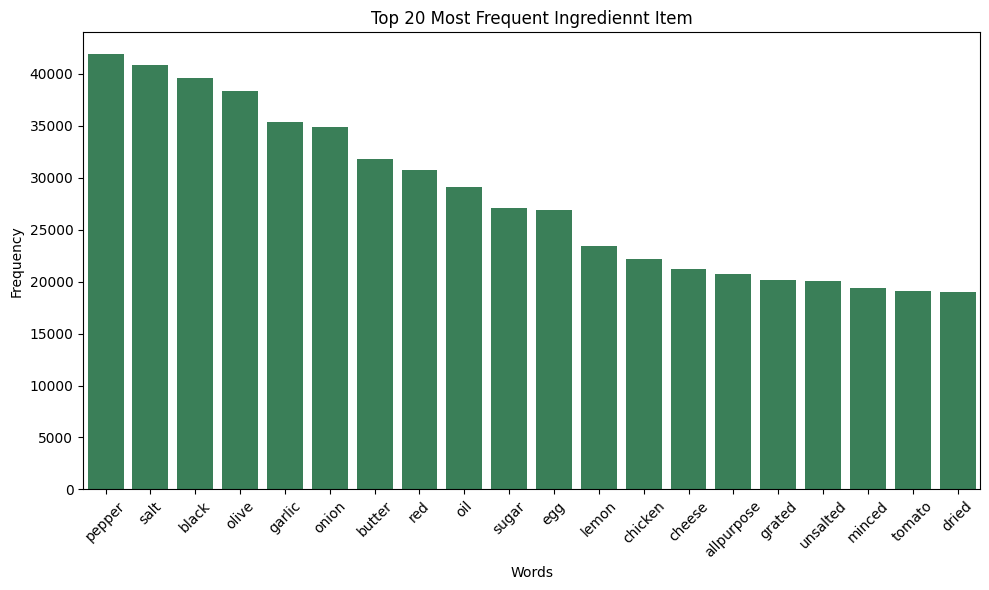

In [47]:
# Top N most frequent words to display
top_n = 20

# Get the top N words and their frequencies
top_words = list(sorted_word_freq.keys())[:top_n]
top_freq = list(sorted_word_freq.values())[:top_n]

plt.figure(figsize=(10,6))
sns.barplot(x=top_words, y=top_freq, color='seagreen')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Ingrediennt Item'.format(top_n))
plt.tight_layout()
plt.show()

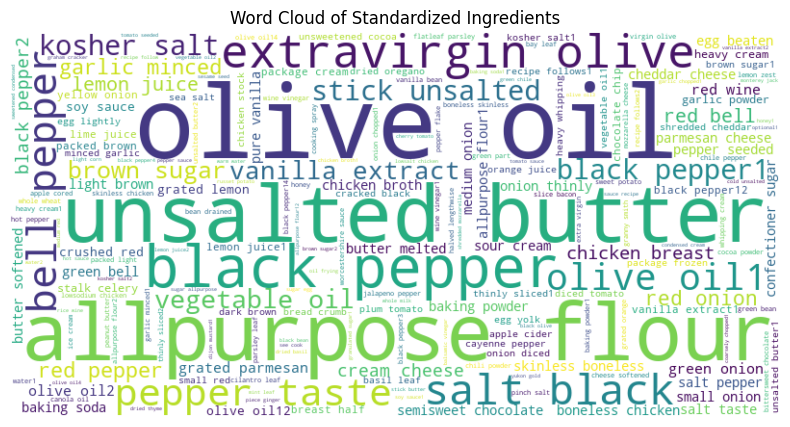

In [48]:
from wordcloud import WordCloud
# Concatenate all the standardized ingredients into a single text
text_data = " ".join(standardized_ingredients)
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Standardized Ingredients')
plt.show()

#### Recipes with maximum number of ingredients

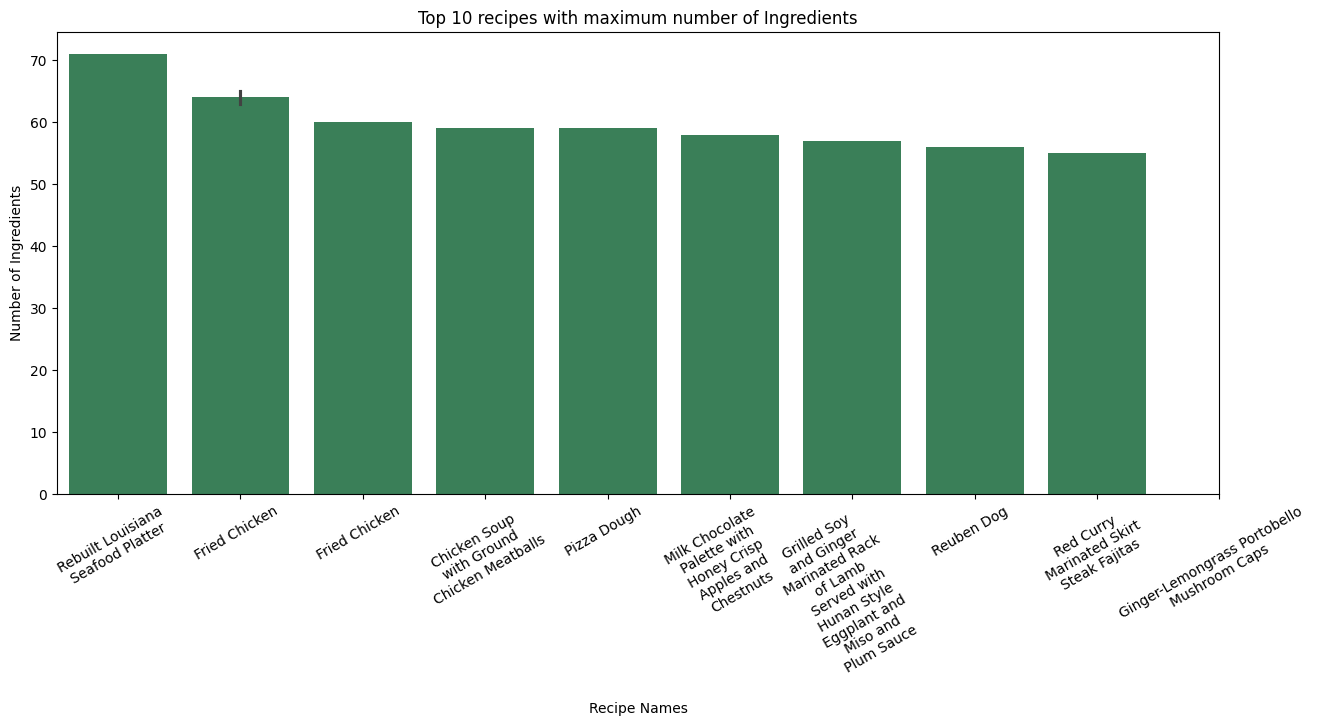

In [49]:
#function to wrap xaxix tick names
#Add new line after three words
def wrap_text(sentence):
    a=sentence.split()
    n=2
    ret= ''
    for i in range(0, len(a), n):
         ret += ' '.join(a[i:i+n]) + '\n'
    return ret
df_plot=df_clean[['title', 'ingredient_item']].sort_values(by='ingredient_item', ascending=False).head(10)
df_plot['wrapped_text']=df_plot['title'].apply(lambda x: wrap_text(x))
plt.figure(figsize=(15,6))
sns.barplot(data=df_plot,
            x='title', y='ingredient_item', color='seagreen')
plt.xlabel('Recipe Names')
plt.ylabel('Number of Ingredients')
plt.xticks(range(0,len(df_plot.index)), df_plot['wrapped_text'].values, rotation=30)
plt.title('Top 10 recipes with maximum number of Ingredients')
plt.show()

#### Combining all text data and standardizig it

Okay, now I am planning to add all text from `title`, `instructions` and `ingredient_item` together so that the search algorithm to find the recommended recipes could make better search even if user knows just the recipe name or a few of the ingredients.

In [50]:
all_text=df_clean['title']+ ' '+df_clean['items']+' '+df_clean['instructions']

In [51]:
cleaned_ver=standardize_text(all_text)

In [52]:
# df_all.info()
df_all=pd.DataFrame(cleaned_ver)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121831 entries, 0 to 121830
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       121831 non-null  object
dtypes: object(1)
memory usage: 951.9+ KB


In [53]:
df_all=df_all.rename(columns={0: 'combined_text'})

### Recommendation using text similarity

#### Implementing TFIDF Vectorization and Cosine Similarity

Let us start with TFIDF vectorization to convert text into numerical representation and then we will implement recommender logic using cosine similarity.
Later on we can try working with word2vec and topic modelling to experiment and learn which approach gives the most relevant recipes.

In [54]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121831 entries, 0 to 121830
Data columns (total 1 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   combined_text  121831 non-null  object
dtypes: object(1)
memory usage: 951.9+ KB


In [55]:
df_all.head(2)

,combined_text
0,slow cooker chicken dumpling package refrigerated biscuit dough torn piece skinless boneless chicken breast half onion diced butter condensed cream chicken soup place chicken butter soup onion slow cooker fill enough water cover cover cook hour high minute serving place torn biscuit dough slow cooker cook dough longer raw center
1,awesome slow cooker pot roast package onion soup mix condensed cream mushroom soup pot roast water slow cooker mix cream mushroom soup onion soup mix water place pot roast slow cooker coat soup mixture cook high setting hour low setting hour


In [56]:
combined_text= df_all['combined_text'].tolist()

In [57]:
# combined_text=cleaned_ver
combined_text[15238]

'nutella® coffee shake milk instant coffee granule sugar vanilla extract ice cube chocolatehazelnut spread nutella® blend ice milk sugar chocolatehazelnut spread instant coffee vanilla extract together blender desired consistency reached second'

In [58]:
combined_text[706]

'eclair cake package instant vanilla pudding mix package graham cracker square container frozen whipped topping thawed milk package prepared chocolate frosting medium bowl thoroughly blend pudding mix whipped topping milk arrange single layer graham cracker square bottom 13x9 baking pan evenly spread half pudding mixture cracker top another layer cracker remaining pudding mixture top final layer graham cracker spread frosting whole cake edge pan cover chill least hour serving'

There are some tokens like 13X9, 12X10inch, 1/2, 160deg F etc which are not removed so we can try two approchaes to get rid of them.
1. We can adjust min_df=5 to see if these tokens are removed during TFIDF vectorization
2. We can remove these by using regex matching.



In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(lowercase= True, min_df=5)

# Apply TF-IDF vectorization to the combined text
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_text)

In [60]:
tfidf_words = tfidf_vectorizer.get_feature_names_out()
print(tfidf_matrix.shape)
print(len(tfidf_words))

(121831, 24508)
24508


In [61]:
tfidf_words[100:800]

array(['12cup', '12cupful', '12cupfuls', '12cups', '12diameter', '12full',
       '12g', '12gallon', '12hole', '12in', '12inch', '12inch1',
       '12inch12', '12inch2', '12inch4', '12inchdeep', '12inchdiameter',
       '12inchdiced', '12inches', '12inchhigh', '12inchlong',
       '12inchround', '12inchsquare', '12inchthick', '12inchwide',
       '12kosher', '12lb', '12long', '12muffin', '12ounce', '12ounces',
       '12oz', '12pint', '12pound', '12pounds', '12qt', '12quart',
       '12salt', '12tablespoon', '12teaspoon', '12teaspoons', '12thick',
       '12to', '12to2inch', '12tsp', '12wide', '12x1', '12x10',
       '12x10inch', '12x12', '12x12inch', '12x15', '12x15inch', '12x16',
       '12x18', '12x18inch', '12x18inches', '12x1inch', '12x2', '12x3',
       '12x4', '12x5inch', '12x6', '12x7inch', '12x8', '12x8inch', '12x9',
       '12x9inch', '13', '130', '1325ounce', '135', '135ounce',
       '138ounce', '13by', '13by18inch', '13by9by2inch', '13by9inch',
       '13cup', '13g', '13in

Okay, so it seems that we were not able to remove this pattern completely. Also, there are some words with number preceeding measurement like - 4pound', '4pounds', '4quart', '4rib', '4serving',
       '4sided', '4th', '4to', '4to5pound', '4x12'

In [62]:
def find_items_with_patterns(item_list, pattern):
    matching_items = []
    for item in item_list:
        if re.search(pattern, item):
            matching_items.append(item)
    return matching_items

# Regular expression pattern to match patterns like "13by30inch"
pattern = r'\d+(?:\/\d+)?(?:[a-z°°]+)?'

# Find items with numbers or patterns
matching_items = find_items_with_patterns(combined_text, pattern)


In [63]:
matching_items[99]

'french baguette egg yolk water water bread flour bread machine yeast sugar salt place water bread flour sugar salt yeast bread machine pan order recommended manufacturer select dough cycle press start cycle ha completed place dough greased bowl turning coat side cover let rise warm place minute doubled bulk dough ready indentation remains touched punch dough lightly floured surface roll 16x12 rectangle dough half creating two 8x12 rectangle roll half dough tightly beginning side pounding air bubble go roll gently back forth taper end place apart greased cookie sheet make deep diagonal slash across loaf every make one lengthwise slash loaf cover let rise warm place minute doubled bulk preheat oven degree f degree c mix egg yolk water brush top loaf bake minute preheated oven golden brown'

In [64]:
def custom_tokenizer(text):
    tokens = text.split()
    tokens= [re.sub(r'\d+$', '', token) for token in tokens]
    # Filter out measurement patterns
    tokens= [token for token in tokens if not re.match(r'^\d+[A-Za-z]+\d+$', token)]
    filtered_tokens = [token for token in tokens if not re.match(r'\d+(?:\/\d+)?(?:[a-z°°]+)?', token)]

    return filtered_tokens


from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, lowercase= True, max_features=50000)

# Apply TF-IDF vectorization to the combined text
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_text)

In [65]:

tfidf_words = tfidf_vectorizer.get_feature_names_out()
print(tfidf_matrix.shape)
print(len(tfidf_words))

(121831, 50000)
50000


In [66]:
tfidf_words[100:900]

array(['accompanimentsalt', 'accompanimentvegetable', 'accompany',
       'accompanying', 'accomplish', 'accomplished', 'according',
       'accordingly', 'accordion', 'accordionstyle', 'account',
       'accoutrement', 'accra', 'accumulate', 'accumulated',
       'accumulates', 'accumulating', 'accuracy', 'accurate',
       'accurately', 'acetate', 'aceto', 'ach', 'achieve', 'achieved',
       'achieves', 'achieving', 'achilleos', 'achiote', 'achioteinfused',
       'acid', 'acidic', 'acidity', 'acidophilus', 'acidsweet',
       'acidulate', 'acidulated', 'acinus', 'ackee', 'acme', 'acorn',
       'acqua', 'acquire', 'acquired', 'acquires', 'acras', 'acre',
       'acrid', 'across', 'act', 'acting', 'action', 'activa', 'activate',
       'activated', 'activates', 'active', 'activedry', 'actively',
       'activity', 'actual', 'actually', 'ad', 'ada', 'adam', 'adams®',
       'adapt', 'adaptable', 'adaptation', 'adapted', 'add', 'added',
       'addicting', 'addiction', 'addictive', 'a

#### User input vectorization using TF-IDF

In [67]:
# Example user input (replace this with actual user input after preprocessing)
user_input = "ground beef, pasta, spaghetti, tomato sauce, bacon, onion, zucchini, and, cheese"

#### Finding recipes using Cosine Similarity

In [68]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Function to calculate cosine similarity between a user input vector and recipe vectors
def calculate_similarity(user_input_vector, recipe_matrix):
    return cosine_similarity(user_input_vector, recipe_matrix)

def find_recipes(user_input):
    
    # Generate the user input vector using the TFIDF model
    user_input_vector = tfidf_vectorizer.transform([user_input])

    # Calculate similarity between user input vector and recipe vectors
    similarities = calculate_similarity(user_input_vector, tfidf_matrix )
    return similarities

similarities=find_recipes(user_input)

In [69]:
# np.argsort(similarities)

In [70]:
# np.where(df_clean.index== 79928)

In [71]:
#resetting index from df_clean since we dropped some rows while preprocessing
df_clean = df_clean.reset_index(drop=True)

In [72]:
# Sort the recipes based on similarity and get top N recommendations
top_n = 5
top_indices = np.argsort(similarities[0])[::-1][:top_n]
top_recipes = [df_clean['title'][i] for i in top_indices]

print(f"Top {top_n} Recipe Recommendations:")
for i, recipe in enumerate(top_recipes, 1):
    print(f"{i}. {recipe}")

Top 5 Recipe Recommendations:
1. Ravenswood Rub
2. Cardamom-Stewed Chickpea and Tomato Ragout
3. Spice-Rubbed American Bison Tenderloin
4. Rudy Mikeska's "All Purpose" Seasoning Rub
5. Champagne Cheddar Spread


In [73]:
#printing out 
df_clean.loc[top_indices, ['title', 'items', 'instructions']]

,title,items,instructions
102371,Ravenswood Rub,"1/2 teaspoon cumin seed, toasted and ground;1 1/2 teaspoons dried oregano;1/4 teaspoon sugar;3/4 teaspoon ground black pepper;2 1/4 teaspoons garlic powder;1/4 teaspoon cayenne pepper;3/4 teaspoon chili powder;1/2 teaspoon mustard seed, toasted and ground;3/4 teaspoon fennel seed, toasted and ground;1/8 teaspoon ground ginger;1 1/2 teaspoons dried thyme;1 1/2 teaspoons onion powder;1 1/2 teaspoons paprika;1 tablespoon kosher salt",Combine all ingredients in a bowl and mix well. Apply this rub mixture on baby back ribs before grilling.
89680,Cardamom-Stewed Chickpea and Tomato Ragout,"Salt and pepper, to taste;1 (15-ounce) can chickpeas, drained and rinsed;1/2 teaspoon cumin seeds, toasted and ground;6 cardamom pods, toasted and ground;1/2 teaspoon coriander seeds, toasted and ground;1/4 cup lemon juice;1/2 cup cilantro, chopped;1/2 cup peanut oil;1 large jalapeno, seeded and chopped;2 large tomatoes, peeled, seeded, and chopped;1/2 teaspoon turmeric powder;1 large onion, diced","Heat a heavy-bottom saucepan over a medium flame. Add oil and onion, cook until translucent. Add cardamom, coriander, cumin, and turmeric, stir for 1 minute. Add jalapenos, tomatoes, and chickpeas; simmer for 20 minutes, season with salt and pepper to taste. Add lime juice and cilantro. Serve warm or at room temperature.;"
70649,Spice-Rubbed American Bison Tenderloin,"1/4 cup paprika;2 teaspoons red chile powder;1 tablespoon sugar;1 tablespoon salt;4 (8-ounce) bison tenderloin fillets;2 teaspoons cumin seed, toasted and ground;2 teaspoons coriander seeds, toasted and ground;1/2 teaspoon allspice, ground;1 teaspoon black peppercorns, freshly ground;1 whole chipotle pepper in adobo, seeded or 1 teaspoon ground dried chipotles",Combine spices and set aside. Heat grill pan or grill to medium-high heat. Place spice on a pie pan or large flat plate and dip both sides of each steak into mixture and shake off excess. Place steak on grill or grill pan and lower heat if using a grill pan or the spices will burn. Grill for 4 to 5 minutes each side. Remove from grill and let rest a couple of minutes before serving.
80289,"Rudy Mikeska's ""All Purpose"" Seasoning Rub","4 ounces chili powder;3 ounces black pepper, finely ground;3 ounces black pepper, coarsely ground;2 ounces garlic powder;1 pound salt;2 ounces hot paprika","Mix all ingredients together and place in an airtight container. Rub on beef, pork, chicken, lamb (anything) generously and marinate 1 to 5 days, refrigerated, before cooking."
79922,Champagne Cheddar Spread,"1/2 teaspoon McCormick® Nutmeg, Ground;4 ounces (1/2 package) cream cheese, softened;1/2 cup Champagne;1/8 teaspoon McCormick® Red Pepper, Ground;1 pound Cheddar cheese, cut into 1-inch chunks;1 teaspoon McCormick® Parsley Flakes","1. Place all ingredients in food processor; cover. Process until smooth. Spoon into serving bowl. Cover.\n2. Refrigerate at least 2 hours to allow flavors to blend. Let stand at room temperature to soften slightly. Serve with assorted cut-up vegetables, crackers or French bread slices."


#### Implementing Word2Vec Embedding

Since we observed that some of the patterns where not removed even after standardization and therefore we will remove these patterns before we implement word2Vec.

Later we will build the word2vec model on our recipe corpora and use it to transform user input data. Later using cosine similarity will try to find the top five recommended recipes.

In [74]:
# Let us remove the words/tokens from our text before feeding it to word2vec model.
def remove_patterns(list_text):
    text_wo_pattern_lst=[]
    for text in list_text:
        tokens = text.split()
        tokens= [re.sub(r'\d+$', '', token) for token in tokens]
        # Filter out measurement patterns
        tokens= [token for token in tokens if not re.match(r'^\d+[A-Za-z]+\d+$', token)]
        filtered_tokens = [token for token in tokens if not re.match(r'\d+(?:\/\d+)?(?:[a-z°°]+)?', token)]

        filtered_text=" ".join(filtered_tokens)
        text_wo_pattern_lst.append(filtered_text)
    
    return text_wo_pattern_lst

In [75]:
clean_text_lst=remove_patterns(combined_text)

In [76]:
len(clean_text_lst)

121831

In [77]:
import gensim
from gensim.models import Word2Vec

# all_tokens=word_tokenize(cleaned_ver)
all_tokens=[]
for i in clean_text_lst:
    all_tokens.append(word_tokenize(i))

# Train Word2Vec model
w2v_model = Word2Vec(sentences=all_tokens, vector_size=100, window=5, min_count=1, workers=4)

In [78]:
w2v_model.wv['fillet']

array([ 0.35019276,  3.179309  ,  0.29394138, -3.8404107 , -2.1028702 ,
        0.46170026,  2.3545418 , -0.40210444,  0.99082875,  1.974241  ,
        0.3025871 ,  0.08210029,  2.8977733 , -0.5193136 , -0.11989106,
       -0.76584136,  1.813976  ,  0.14730474, -1.382447  , -2.373777  ,
       -2.5272012 , -2.9445028 ,  3.1130652 , -1.8255793 , -3.7528172 ,
       -1.0175514 ,  0.47553685,  0.85058624,  0.6808059 , -4.267502  ,
        3.6486745 ,  0.416419  , -0.3449008 ,  0.78759676,  2.133595  ,
        2.8843007 , -2.3700042 , -0.0869869 ,  3.803897  ,  3.9437575 ,
        2.8055375 , -0.9186143 , -2.8109493 ,  1.3914965 ,  0.38130808,
       -0.14407586,  0.04265772,  1.0683496 ,  1.5369861 ,  2.4337296 ,
       -1.9146369 ,  0.9008609 ,  2.2407782 , -0.73173517,  4.5213165 ,
        0.9870415 ,  0.44616035,  0.6612141 ,  1.3617238 ,  0.07423311,
        2.110159  ,  3.7180135 ,  1.202285  , -0.85126346, -0.6875694 ,
       -0.5423043 ,  4.6364775 ,  3.0936325 ,  0.68741703,  1.00

In [79]:
len(all_tokens)

121831

In [80]:
w2v_model.wv.most_similar('beef')

[('pork', 0.6700337529182434),
 ('chuck', 0.6577619910240173),
 ('venison', 0.6312771439552307),
 ('brisket', 0.6302217841148376),
 ('veal', 0.6244679093360901),
 ('oxtail', 0.6113141775131226),
 ('sirloin', 0.6058905720710754),
 ('meat', 0.6046891212463379),
 ('lamb', 0.5809490084648132),
 ('chicken', 0.5796764492988586)]

In [81]:
len(w2v_model.wv.index_to_key)

90381

In [82]:
# Generate user input vector
user_input = "ground beef, pasta, spaghetti, tomato sauce, bacon, onion, zucchini, and, cheese"
# user_input = standardize_text(user_input)
user_input_tokens = word_tokenize(user_input)

# Initialize an empty user input vector
user_input_vector = [0] * w2v_model.vector_size

# Calculate the mean vector of the user input tokens
num_tokens = 0
for token in user_input_tokens:
    if token in w2v_model.wv:
        user_input_vector = [a + b for a, b in zip(user_input_vector, w2v_model.wv[token])]
        num_tokens += 1

if num_tokens > 0:
    user_input_vector = [x / num_tokens for x in user_input_vector]



In [83]:
recipe_vector=[0]*w2v_model.vector_size
all_recipes_vector=[]
for i in all_tokens:
   # Calculate the mean vector of the each recipe
    num_tokens = 0 
    for token in i:
        if token in w2v_model.wv:
            recipe_vector = [a + b for a, b in zip(recipe_vector, w2v_model.wv[token])]
            num_tokens += 1

    if num_tokens > 0:
        recipe_vector = [x / num_tokens for x in recipe_vector]
    all_recipes_vector.append(recipe_vector)

In [84]:
all_recipes_vector=np.array(all_recipes_vector)

In [85]:
user_input_vector = np.array(user_input_vector).reshape(1, -1)
# Calculate cosine similarity between user input and all recipes
similarities2 = cosine_similarity(user_input_vector, all_recipes_vector)

# Recommend top recipes
# Get the indices of top N similar recipes
N = 5  # Number of recipes to recommend
top_indices2 = similarities2.argsort()[0][-N:][::-1]

# Print the top N recommended recipes
for idx in top_indices2:
    print(df_clean['title'][idx])

Spicy Pizza Soup
Mild 'Sweet' Tomato Sauce with Elbow Macaroni Bake
Skillet Spaghetti Supper
Cavatini I
Nadine's - Na's Pasta


In [86]:
df_clean.loc[top_indices2, ['title', 'items', 'instructions']]

,title,items,instructions
11157,Spicy Pizza Soup,"1 (6 ounce) can tomato paste ;4 cups water ;2 onions, chopped ;;3 cups crushed tomatoes with garlic ;1 pound pepperoni sausage, sliced ;2 cups chopped fresh mushrooms ;2 cups shredded mozzarella cheese ;3 green bell peppers, chopped ;1 (15 ounce) can tomato sauce ;1 1/2 cups uncooked elbow macaroni ;1 3/8 pounds hot Italian sausage, sliced","In a large saucepan, place the hot Italian sausage, pepperoni sausage, green bell peppers, onions, mushrooms, diced tomatoes, tomato sauce, tomato paste and water. Bring to a boil. Boil 30 minutes, reduce heat and simmer 90 minutes.\nDuring the final 15 minutes of cooking, stir in the elbow macaroni.\nTop with mozzarella and serve.\n"
31223,Mild 'Sweet' Tomato Sauce with Elbow Macaroni Bake,"1/2 cup chopped onion ;1/2 pound ground pork ;1 carrot ;2 cups shredded sharp Cheddar cheese ;;1/8 teaspoon ground black pepper ;1/2 pound lean ground beef ;1/4 teaspoon white sugar ;1/2 teaspoon salt ;4 ounces canned mushrooms ;1/2 pound elbow macaroni, cooked ;2 tablespoons vegetable oil ;1/2 clove garlic, minced ;1 (8 ounce) can tomato sauce ;6 ounces tomato paste","Cook beef, pork, onion, and garlic in hot oil until onion is golden. Add tomato sauce, tomato paste, mushrooms, carrot, salt, pepper, and sugar, and simmer 15 minutes.\nRemove the carrot and throw away--it is just there for sweetness.\nAlternate layers of macaroni, cheese, and meat in greased 2-quart casserole. Sprinkle top with cheese.\nBake in a 350 degree F (175 degrees C) oven for 45 minutes.\n"
29209,Skillet Spaghetti Supper,1 pound uncooked linguine ;1 (28 ounce) can crushed tomatoes ;1 cup diced onion ;;2 teaspoons dried oregano ;1 tablespoon dried parsley ;2 cups shredded mozzarella cheese ;1 pound lean ground beef ;1 teaspoon minced garlic,"In a large skillet over medium heat, saute onion and garlic in a small amount of oil. Stir in ground beef, tomatoes, parsley and oregano, pasta and one cup of the mozzarella, simmering mixture. Cover with the rest of the cheese and simmer for 40 more minutes or until top is slightly crispy.\n"
11163,Cavatini I,"2 (4.5 ounce) cans sliced mushrooms, drained ;ground black pepper to taste ;6 ounces rotini pasta ;2 pounds mozzarella cheese, shredded ;;3 ounces sliced pepperoni sausage ;2 tablespoons grated Parmesan cheese ;1/4 cup butter ;2 pounds lean ground beef ;1 (32 ounce) jar spaghetti sauce ;1 onion, chopped ;1/2 cup cooked and cubed chicken ;1 green bell pepper, chopped ;4 ounces chopped ham ;1/4 teaspoon crushed red pepper flakes ;1 (15 ounce) can tomato sauce ;salt to taste ;3/4 cup seashell pasta","In a small skillet, saute onions, green peppers, and mushrooms in butter or margarine. Set aside.\nBrown hamburger in a large skillet over medium heat. Drain. Mix in tomato sauce, pasta sauce, chopped ham, chopped chicken or turkey, pepperoni, salt, and red and black pepper. Add vegetable saute to hamburger mixture.\nCook pasta according to package directions. Drain.\nSpread a little sauce over the bottom of two 9 x 13 inch pans. In each pan, place a layer of pasta, a layer of mozarella cheese, a hamburger sauce layer, a sprinkling of Parmesan cheese, and another layer of mozarella cheese. Repeat layers. Cover pans.\nBake at 350 degrees F (175 degrees C) for 30 to 45 minutes.\n"
104508,Nadine's - Na's Pasta,"Three 1-inch-thick slices salami, cubed;3 tomatoes, diced;Garlic bread or Italian butter bread, for serving;Salt and pepper;1 1/2 pounds bulk hot Italian sausage;Three 1-inch-thick slices capicolla, cubed;3 cups marinara sauce;1 1/2 pounds trio pasta (combination of shells, fusilli and penne rigate);3 red peppers, chopped;Grated Asiago cheese, for garnish;1 onion, chopped","Saute the hot Italian sausage and drain off all of the fat. Add the sausage, salami, capicolla, tomatoes, onion and red peppers to the saute pan and mix well. Add salt and pepper, to taste.\nPreheat the oven to 350 degrees F.\nCook the pasta in boiling water until al de

## Recommendation based on Topic Modeling

### Topic modeling using Gensim based LDA on BOW

Iniotially, I am going ahead with modelling arbitary 10 topics and later will use grid search to find the optimal number of topics.

In [87]:
from gensim import corpora, models
from gensim.models.ldamodel import LdaModel
from gensim import similarities

# Step 1: Prepare the Recipe Data


tokenized_recipes=[]
for i in clean_text_lst:
    tokenized_recipes.append(word_tokenize(i))

# Step 2: Create a Gensim Dictionary
dictionary = corpora.Dictionary(tokenized_recipes)

# Step 3: Create a Gensim Corpus
corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_recipes]

# Step 4: Train the LDA Model

num_topics = 10  # Specify the number of topics
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)



In [88]:
# Step 5: Transform User Input
user_input = "ground beef, pasta, spaghetti, tomato sauce, bacon, onion, zucchini, cheese"
user_input_tokens = [token for token in standardize_text(user_input)]
user_input_bow = dictionary.doc2bow(user_input_tokens)

# Step 6: Get Topic Distribution for User Input
user_topic_distribution = lda_model[user_input_bow]

# Step 7: Recommend Recipes
# Calculate similarity scores between user_topic_distribution and recipe topic distributions
index = similarities.MatrixSimilarity(lda_model[corpus])
sims = index[user_topic_distribution]

# Sort recipes by similarity scores
sorted_recipes = sorted(enumerate(sims), key=lambda item: -item[1])

# Get the top recommended recipes
top_recipes = sorted_recipes[:5]

# Print the top recommended recipe indices
print(top_recipes)

[(118286, np.float32(0.9975092)), (16456, np.float32(0.997231)), (112009, np.float32(0.99676144)), (6716, np.float32(0.9959334)), (99884, np.float32(0.9956234))]


In [89]:
top_recipes_index=[i[0] for i  in top_recipes]
top_recipes_index

[118286, 16456, 112009, 6716, 99884]

In [90]:
top_recipes = [df_clean['title'][i] for i in top_recipes_index]

print(f"Top {top_n} Recipe Recommendations:")
for i, recipe in enumerate(top_recipes, 1):
    print(f"{i}. {recipe}")

Top 5 Recipe Recommendations:
1. Gina's Summer Tomato Pie
2. Sausage, Spinach and Ricotta Calzone
3. Three Cheese and Artichoke Calzones
4. Sun-dried Tomatoes I
5. Cheesy Deep-Dish Sausage and Tomato Pizza


In [91]:
df_clean.iloc[top_recipes_index]

,title,instructions,ingredient_item,items,recipe_words
118286,Gina's Summer Tomato Pie,"Watch how to make this recipe.\nPreheat your oven to 375 degrees F. Line a baking sheet with parchment paper.\nSprinkle flour on a work surface. Roll out pie dough to form a 10-inch circle and place on baking sheet. Overlap and alternate the different tomatoes and mozzarella slices in the center of the dough, leaving a 3-inch border. Scatter the basil leaves on top. Sprinkle with salt and pepper and red pepper flakes. Fold the uncovered edges of the dough inward over the filling to create a pleated crust. Brush edges and top of pie with olive oil.\nPlace in the oven and bake for 35 minutes. Remove from the oven to a cutting board. Slice and serve.",9,"One 9-inch ready-made refrigerated rolled pie crust;Kosher salt and freshly ground black pepper;1/4 cup chiffonade basil leaves;8 ounces mozzarella, sliced;2 large yellow tomatoes, sliced 1/4-inch thick;Flour, for dusting work surface;1 red tomato, sliced 1/4-inch thick;1/4 teaspoon red pepper flakes;Extra-virgin olive oil",119
16456,"Sausage, Spinach and Ricotta Calzone","Preheat oven to 375 degrees F.\nCombine 1 cup flour, undissolved yeast, sugar and salt in a large bowl. Add very warm water and oil; mix until well blended, about 1 minute. Gradually add enough remaining flour to make a soft dough. Dough should form a ball and will be slightly sticky. Knead** on a floured surface, adding additional flour if necessary, until smooth and elastic, about 4 minutes. Cover and let rest on floured surface while preparing filling.\nCook sausage in skillet over medium-high heat until cooked through; remove from skillet and drain excess fat. Add spinach and water to skillet; saute 1 to 2 minutes until spinach is wilted; drain. Return sausage to pan.\nCombine ricotta, mozzarella and egg in a mixing bowl. Stir in Italian herb seasoning, crushed red pepper and garlic salt; set aside.\nTo make calzones divide dough into four portions. Roll 1 portion into an 8-inch circle on a floured surface. Spread approximately 1/3 cup ricotta mixture in center bottom half of dough. Top with heaping 1/3 cup sausage spinach mixture leaving outer 1/2-inch free of filling. Fold top half of dough over filling. Pull edge of lower crust over top; folding and pressing layers together to form a seal. Carefully transfer to greased baking sheet. Cut 3 to 4 vents in top. Repeat with remaining dough. Bake for 15 to 20 minutes until lightly browned. Transfer to cooling rack to keep bottom crust crisp while cooling slightly. Serve with pizza sauce or other sauce for dipping.\n",19,"1/2 teaspoon Spice Islands® Garlic Salt ;;1 teaspoon sugar ;1/2 teaspoon Spice Islands® Crushed Red Pepper ;1 envelope Fleischmann's® Pizza Crust Yeast ;Pizza sauce OR marinara sauce ;8 ounces Italian sausage ;1/4 cup water ;2 cups fresh spinach leaves ;1 1/2 cups all-purpose flour, or more if needed ;Crust: ;3/4 cup ricotta cheese ;1 tablespoon vegetable oil ;Filling: ;1 egg ;1 teaspoon Spice Islands® Italian Herb Seasoning ;3/4 cup shredded mozzarella cheese ;3/4 teaspoon salt ;2/3 cup very warm water (120 degrees to 130 degrees F)*",253
112009,Three Cheese and Artichoke Calzones,"Watch how to make this recipe.\nPosition a rack in the center of the oven and preheat to 400 degrees F. Lightly sprinkle a heavy nonstick baking sheet with cornmeal. Set aside.\nIn the bowl of the food processor, add the artichoke hearts, Pecorino Romano, ricotta, fontina, sun-dried tomatoes, lemon juice, salt, pepper and lemon zest. Pulse until combined and chunky.\nUsing a knife, cut the pizza dough into quarters. On a lightly floured surface, roll out the dough into four 6-inch circles, each about 1/4-inch thick. Using a pastry brush, brush the dough with the egg white. Place a quarter of the filling on one side of each circle of dough. Fold the dough over the filling, forming a half circle. Pinch the edges of dough firmly together and crimp to seal. Place the prepared indivi

In [92]:
lda_model.show_topics(formatted=False)

[(0,
  [('sugar', np.float32(0.028094523)),
   ('juice', np.float32(0.023786081)),
   ('ice', np.float32(0.02017836)),
   ('lemon', np.float32(0.019975808)),
   ('orange', np.float32(0.017739363)),
   ('water', np.float32(0.01556)),
   ('apple', np.float32(0.014363494)),
   ('cream', np.float32(0.012241584)),
   ('add', np.float32(0.0106735155)),
   ('glass', np.float32(0.010615354))]),
 (1,
  [('pepper', np.float32(0.03657026)),
   ('oil', np.float32(0.029295145)),
   ('salt', np.float32(0.024205761)),
   ('bowl', np.float32(0.017615465)),
   ('red', np.float32(0.016202087)),
   ('garlic', np.float32(0.0154377585)),
   ('vinegar', np.float32(0.01535117)),
   ('olive', np.float32(0.014271436)),
   ('onion', np.float32(0.013970275)),
   ('add', np.float32(0.013440228))]),
 (2,
  [('dough', np.float32(0.029093793)),
   ('sheet', np.float32(0.0188018)),
   ('minute', np.float32(0.01598972)),
   ('flour', np.float32(0.01543541)),
   ('place', np.float32(0.012433788)),
   ('roll', np.float3

#### Using grid search and coherence score to find optimal number of topics

In [93]:
from gensim.models.coherencemodel import CoherenceModel
def compute_coherence_values_lda_model(dictionary, corpus, texts, limit, start=2, step=6):
    coherence_values_lda = []
    model_list_lda = []
    for num_topics in range(start, limit, step):
        lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics,
                                       chunksize=2000,
                                       alpha='auto',
                                       eta='auto',
                                       iterations=400,
                                       passes=20,
                                       eval_every=None)
        print(num_topics)
        model_list_lda.append(lda_model)
        coherencemodel_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values_lda.append(coherencemodel_lda.get_coherence())

    return model_list_lda, coherence_values_lda

In [ ]:

model_list_lda, coherence_values_lda = compute_coherence_values_lda_model(dictionary=dictionary,corpus=corpus, texts=tokenized_recipes, start=10, limit=50, step=10)

10


In [ ]:
model_list_lda, coherence_values_lda

Lets us visualize and see how the coherence score is varying.

In [ ]:
%matplotlib inline
# Show graph
limit=50; start=10; step=10;
x = range(start, limit, step)
y_lda = coherence_values_lda

plt.plot(x, y_lda, label='LDA_model')
    
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")    
plt.legend()
plt.savefig('model_lda_coherence_score.png')
plt.show()

Clearly, we can see that there is a decreasing trend and score is highest for 10 number of topics.

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values_lda):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

The optimal model of LDA using BOW corpus is the one with higher coherence score:

In [ ]:
optimal_model_lda = model_list_lda[0]

optimal_model_lda.show_topics()

In [ ]:
def create_wordcloud(model, topic):
    text = {word: value for word, value in model.show_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic" + " "+ str(topic))
    plt.show()
    
 #visualize the first 3 topics for LDA with BOW corpus
for i in range(1,4):
    create_wordcloud(optimal_model_lda, topic=i)


In [ ]:
# Step 5: Transform User Input
user_input = "ground beef, pasta, spaghetti, tomato sauce, bacon, onion, zucchini, cheese"
user_input_tokens = [token for token in standardize_text(user_input)]
user_input_bow = dictionary.doc2bow(user_input_tokens)

# Step 6: Get Topic Distribution for User Input
user_topic_distribution = optimal_model_lda[user_input_bow]

# Step 7: Recommend Recipes
# Calculate similarity scores between user_topic_distribution and recipe topic distributions
index = similarities.MatrixSimilarity(optimal_model_lda[corpus])
sims = index[user_topic_distribution]

# Sort recipes by similarity scores
sorted_recipes = sorted(enumerate(sims), key=lambda item: -item[1])

# Get the top recommended recipes
top_recipes = sorted_recipes[:5]

# Print the top recommended recipe indices
print(top_recipes)

In [ ]:
top_recipes = [df_clean['title'][i] for i in top_recipes_index]

print(f"Top {top_n} Recipe Recommendations:")
for i, recipe in enumerate(top_recipes, 1):
    print(f"{i}. {recipe}")

In [ ]:
df_clean.iloc[top_recipes_index]

#### Conclusion

Since we don't have a labelled data our model is unsupervised and hence evaluation materics is not there. However from observing the result and comparing the models we found that only **Word2Vec gave out the relevant recipes.**

Later I would like to make a streamlit app that users can use and play around.

#### Playing around with Word2Vec model

In [ ]:
user_input='chicken, spinach'

In [ ]:
#vectorize user input as per Word2Vec Model

def user_input_vectorize(word2vec_model, user_input):
    
    user_input_tokens = word_tokenize(user_input)

    # Initialize an empty user input vector
    user_input_vector = [0] * word2vec_model.vector_size

    # Calculate the mean vector of the user input tokens
    num_tokens = 0
    for token in user_input_tokens:
        if token in word2vec_model.wv:
            user_input_vector = [a + b for a, b in zip(user_input_vector, word2vec_model.wv[token])]
            num_tokens += 1

    if num_tokens > 0:
        user_input_vector = [x / num_tokens for x in user_input_vector]
    
    return user_input_vector

def recommend_w2v(user_input_vector):
    user_input_vector = np.array(user_input_vector).reshape(1, -1)
    # Calculate cosine similarity between user input and all recipes
    similarities2 = cosine_similarity(user_input_vector, all_recipes_vector)

    # Recommend top recipes
    
    N = 5  # Number of recipes to recommend
    top_indices2 = similarities2.argsort()[0][-N:][::-1]
    
    return top_indices2


In [ ]:
indices=recommend_w2v(user_input_vectorize(w2v_model , user_input))

In [ ]:
# Print the top N recommended recipes
for idx in indices:
    print(df_clean['title'][idx])


In [ ]:
df_clean.loc[indices, ['title', 'items', 'instructions']]

In [ ]:
user_input='zuchinni, carrot, lamb meat, wheat flour, onion'

In [ ]:
indices=recommend_w2v(user_input_vectorize(w2v_model , user_input))
# Print the top N recommended recipes
for idx in indices:
    print(df_clean['title'][idx])

In [ ]:
df_clean.loc[indices, ['title', 'items', 'instructions']]

Given that our current constraints of not having labels or user feedback, we are stopping here. However, there are a few aspects to consider and if possible I would like to implement in future:

- Evaluation Metrics: We could compare the average cosine scores of the different approaches we employed in our project but I am stopping here since the result of LDA based model appeared very inaccurate. A higher average similarity score generally indicates better recommendations.

- User Engagement: Monitor user engagement with the recommender system. Track metrics such as the number of clicks on recommended recipes, the time spent on recipe pages, and the number of interactions with the recommendations. These metrics can provide insights into how well your system is performing in the absence of explicit user feedback.

- Tuning Hyperparameters: Experiment with different hyperparameters in your recommendation models (e.g., number of topics in LDA, TF-IDF vectorization settings) to see if they impact the quality of recommendations. Already tried tuning the number of topics on LDA but tuned on a limited set as it was taking a long run time.

- User Surveys: Although we don't have explicit feedback, we can conduct user surveys or collect feedback through user interviews to gather qualitative information about their satisfaction with the recommendations.
